# Importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import itertools
import collections

import sklearn as skl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

import networkx as nx

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Loading in the data
adj_mat = pd.read_csv("/content/drive/My Drive/Methods for Data Science/adjacency_matrix.csv")
feat_mat = pd.read_csv("/content/drive/My Drive/Methods for Data Science/feature_matrix.csv")
fash_mnist_train = pd.read_csv("/content/drive/My Drive/Methods for Data Science/fashion-mnist_train.csv")
fash_mnist_test = pd.read_csv("/content/drive/My Drive/Methods for Data Science/fashion-mnist_test.csv")

# Task 1

## 1.1 Clustering of the Feature Matrix

Below we define a function that takes feature data as an input and computes and plots the Calinski-Harabasz score for kMeans clustering, for a range of values of k. From this, it picks the first CH score below 7 and returns the clustering that achieved this score.

In [ ]:
def kmeans_chscore(X, min, max, min_score, randint, verbose=True):

  ## This function takes a feature matrix and computes the CH score of K-means 
  ## clustering for each value between min and max inclusive


  # Importing...
  from sklearn.cluster import KMeans
  from sklearn.metrics import calinski_harabasz_score

  ch_scores = np.zeros(max-min+1)

  # Looping over each value in range
  for val, i in enumerate(range(min,max+1)):

    # Fitting and computing score
    imeans = KMeans(n_clusters=i, random_state=randint).fit(X)
    labels = imeans.labels_
    ch_score = calinski_harabasz_score(X, labels)

    # Saving score to vector, printing current iteration value
    ch_scores[val] = ch_score
    if verbose == True:
      print('Finished Clustering [{}/{}]'.format(i,max))

  # Plotting results of scoring for each value in given range
  ch_score_plot = plt.subplots(1,1,figsize=(10,6))

  plt.title('Calinski-harabasz score for different numbers of clusters in K-Means clustering')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Calinski-Harabasz score')
  plt.axhline(y=7, dashes=(5,2), color='gray')
  plt.plot(ch_scores)
  
  # Returning lowest cluster with CH score < 7
  # If none exists, use k=10 for clustering output
  first_score=10
  for cluster, score in enumerate(ch_scores):
    if score < min_score:
      first_score = cluster
      break

  # Creating and returning chosen clustering
  opt_kmeans = KMeans(n_clusters=first_score).fit(X)
  return opt_kmeans

Finished Clustering [2/30]
Finished Clustering [3/30]
Finished Clustering [4/30]
Finished Clustering [5/30]
Finished Clustering [6/30]
Finished Clustering [7/30]
Finished Clustering [8/30]
Finished Clustering [9/30]
Finished Clustering [10/30]
Finished Clustering [11/30]
Finished Clustering [12/30]
Finished Clustering [13/30]
Finished Clustering [14/30]
Finished Clustering [15/30]
Finished Clustering [16/30]
Finished Clustering [17/30]
Finished Clustering [18/30]
Finished Clustering [19/30]
Finished Clustering [20/30]
Finished Clustering [21/30]
Finished Clustering [22/30]
Finished Clustering [23/30]
Finished Clustering [24/30]
Finished Clustering [25/30]
Finished Clustering [26/30]
Finished Clustering [27/30]
Finished Clustering [28/30]
Finished Clustering [29/30]
Finished Clustering [30/30]


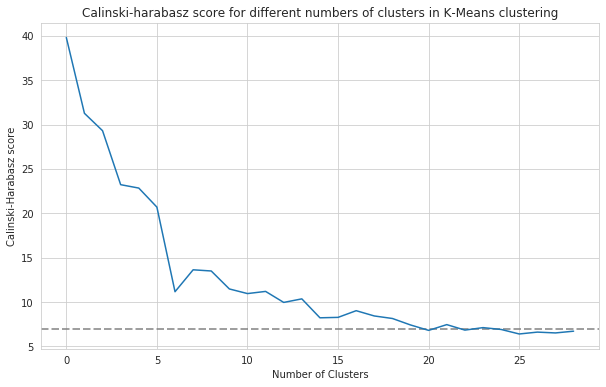

In [ ]:
opt_kmeans = kmeans_chscore(feat_mat, 2, 30, 7, None)

In [ ]:
print('First clustering numbering that returns a CH score < 7: {}'.format(len(np.unique(opt_kmeans.labels_))))

First clustering numbering that returns a CH score < 7: 17


The function returns the above numbr of clusterings as the first number of clusters that returns a CH score below 7. Here, we explore this clustering and report some of its characteristics.

#### Distribution of cluster sizes

<BarContainer object of 17 artists>

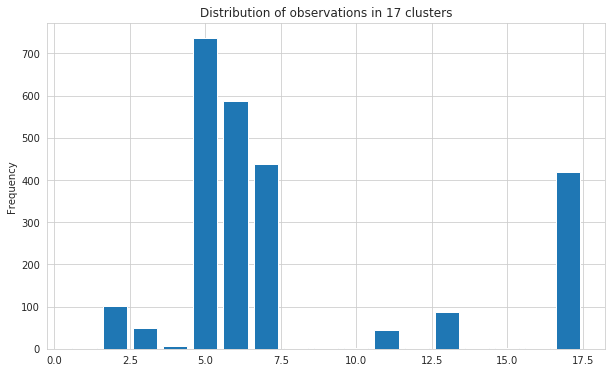

In [ ]:
from sklearn.cluster import KMeans

# Calculating distribution of cluster sizes
opt_labels = opt_kmeans.labels_
opt_labels_bar = np.unique(opt_labels, return_counts=True)

# Plotting distribution of data in each cluster
clust_dist_plot = plt.subplots(1,1,figsize=(10,6))

plt.title('Distribution of observations in {} clusters'.format(len(np.unique(opt_kmeans.labels_))))
plt.ylabel('Frequency')
plt.bar(opt_labels_bar[0]+1,opt_labels_bar[1])

### Within group and across group similarities

In [ ]:
# Davies-Bouldin Index
def kmeans_dbindex(X, min, max, randint, verbose=True):

  ## This function takes a feature matrix and computes the CH score of K-means 
  ## clustering for each value between min and max inclusive


  # Importing...
  from sklearn.cluster import KMeans
  from sklearn.metrics import davies_bouldin_score

  db_scores = np.zeros(max-min+1)

  # Looping over each value in range
  for val, i in enumerate(range(min,max+1)):

    # Fitting and computing score
    imeans = KMeans(n_clusters=i, random_state=randint).fit(X)
    labels = imeans.labels_
    db_score = davies_bouldin_score(X, labels)

    # Saving score to vector, printing current iteration value
    db_scores[val] = db_score
    if verbose == True:
      print('Finished Clustering [{}/{}]'.format(i,max))

  # Plotting results of scoring for each value in given range
  db_score_plot = plt.subplots(1,1,figsize=(10,6))

  plt.title('Davies-Bouldin Index for different numbers of clusters in K-Means clustering')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Davies-Bouldin Index')
  plt.plot(db_scores)

In [ ]:
# Silhouette score
def kmeans_silscore(X, min, max, randint, verbose=True):

  ## This function takes a feature matrix and computes the Silhouette score of K-means 
  ## clustering for each value between min and max inclusive


  # Importing...
  from sklearn.cluster import KMeans
  from sklearn.metrics import silhouette_score

  sil_scores = np.zeros(max-min+1)

  # Looping over each value in range
  for val, i in enumerate(range(min,max+1)):

    # Fitting and computing score
    imeans = KMeans(n_clusters=i, random_state=randint).fit(X)
    labels = imeans.labels_
    sil_score = silhouette_score(X, labels)

    # Saving score to vector, printing current iteration value
    sil_scores[val] = sil_score
    if verbose == True:
      print('Finished Clustering [{}/{}]'.format(i,max))

  # Plotting results of scoring for each value in given range
  sil_score_plot = plt.subplots(1,1,figsize=(10,6))

  plt.title('Silhouette score for different numbers of clusters in K-Means clustering')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Silhouette Score')
  plt.plot(sil_scores)

In [ ]:
kmeans_dbindex(feat_mat, 2, 30, randint=10, verbose=False)

KeyboardInterrupt: ignored

The figure above plots the Davies-Bouldin Index for different values of $k$ in kMeans clustering. This score evaluates the separation between clusters, with a lower score indicating a better separation. The plot shows that values of $k$ between 20 and 25 return the largest within group similarities compared to the across group similarities, which reflects the results of the forced choice of CH score.

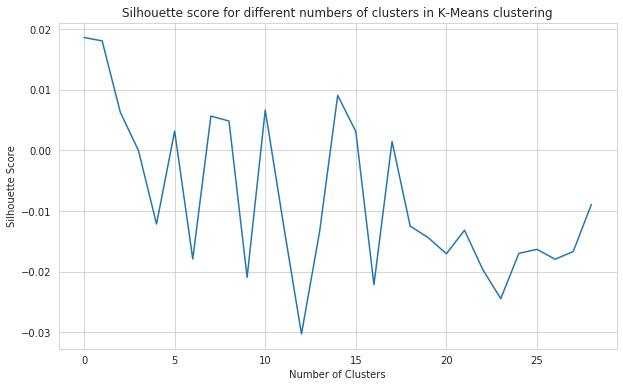

In [ ]:
kmeans_silscore(feat_mat, 2, 30, randint=10, verbose=False)

The figure above plots the Silhouette score for different values of $k$ in kMeans clustering, where a higher score relates to a model with better defined clusters. This is calculated by comparing the mean distance between a sample and all other points in the same class to the mean distance between a sample and all other points in the next nearest cluster. In this way, compactness and fitting of the clustering can be measured.

The plot shows that values of $k$ between 20 and 25 return the best within group similarities compared to the across group similarities. However, neither the Silhouette score nor the Davies-Bouldin Index return promising values for *any* level of clustering usiung the kMeans algorithm. This may be because the content of the paper in the dataset has a lot of overlap, despite being in distinct fields. That is to say that the dictionary is not representitive of the content of the paper.

### Characteristics the optimal clustering of the data

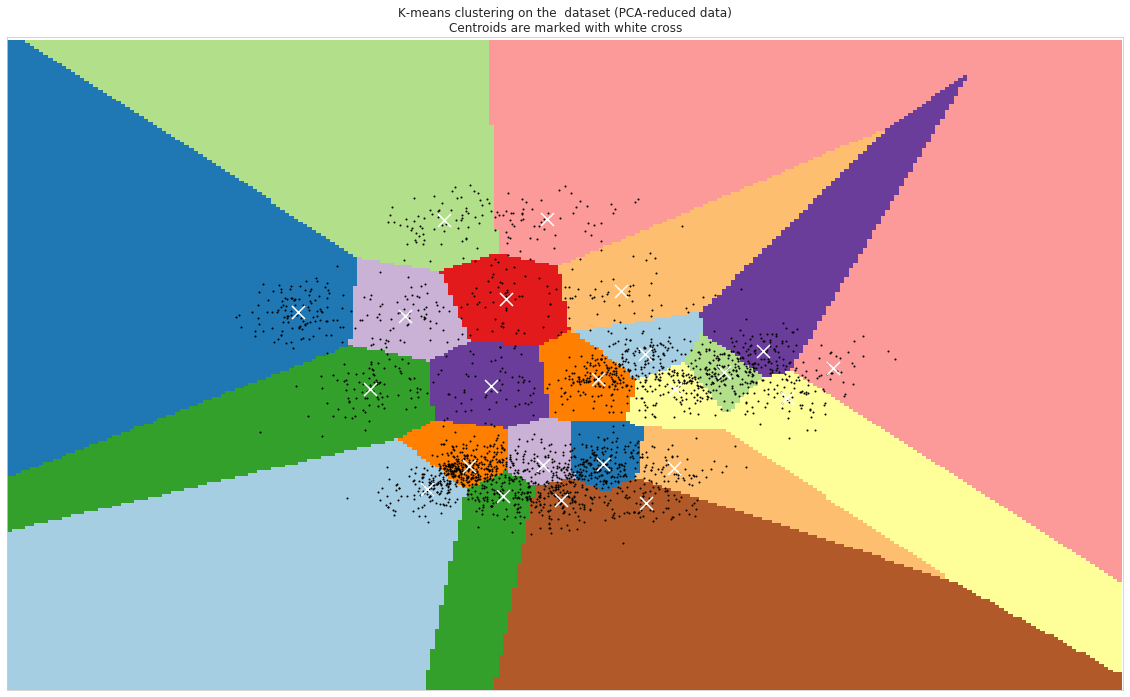

In [ ]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(feat_mat)
pca_kmeans = KMeans(n_clusters = len(np.unique(opt_kmeans.labels_))).fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = pca_kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20,12))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = pca_kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the  dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
# Calculating explained variance ratios of principal components
n=2
pcaobject = PCA(n_components=n).fit(feat_mat)
print('The first {} principal components of this decomposition account for {}% of the variance in the data'.format(n, sum(pcaobject.explained_variance_ratio_)*100))

The first 2 principal components of this decomposition account for 3.402262405525075% of the variance in the data


The above plot reduces the feature map to its first two principal components, and visualises the decision boundaries for each cluster. However, this is a different clustering than the one printed above, and the first two principal components only account for less than 10% of the variance in the data, and so the decompoisition and resulting clustering are effectively useless in our task.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Printing clustering scores of optimal clustering
print('David-Bouldin Index of optimal clustering: {}'.format(davies_bouldin_score(feat_mat, opt_kmeans.labels_)))
print('Silhouette score of optimal clustering: {}'.format(silhouette_score(feat_mat, opt_kmeans.labels_)))

David-Bouldin Index of optimal clustering: 8.9523069132833
Silhouette score of optimal clustering: -0.04086044842149549


The literature online suggests that a higher CH score indicates a better fit of the clustering algorithm, and that the clusters exhibit larger variance between clusters than within clusters. However, our relatively low score of below 7 is reflected in the poor performance of the clustering by the metrics printed above. 

### Robustness of our results

In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Running the clustering 50 times and computing the CH score of the clustering
ch_vec = [0]*50

for i in range(0,50):
  curr_clust = KMeans(n_clusters=len(np.unique(opt_kmeans.labels_))).fit(feat_mat)
  ch_vec[i] = calinski_harabasz_score(feat_mat, curr_clust.labels_)
  print('Finished Scoring [{}/{}]'.format(i+1, 50))

Finished Scoring [1/50]
Finished Scoring [2/50]
Finished Scoring [3/50]
Finished Scoring [4/50]
Finished Scoring [5/50]
Finished Scoring [6/50]
Finished Scoring [7/50]
Finished Scoring [8/50]
Finished Scoring [9/50]
Finished Scoring [10/50]
Finished Scoring [11/50]
Finished Scoring [12/50]
Finished Scoring [13/50]
Finished Scoring [14/50]
Finished Scoring [15/50]
Finished Scoring [16/50]
Finished Scoring [17/50]
Finished Scoring [18/50]
Finished Scoring [19/50]
Finished Scoring [20/50]
Finished Scoring [21/50]
Finished Scoring [22/50]
Finished Scoring [23/50]
Finished Scoring [24/50]
Finished Scoring [25/50]
Finished Scoring [26/50]
Finished Scoring [27/50]
Finished Scoring [28/50]
Finished Scoring [29/50]
Finished Scoring [30/50]
Finished Scoring [31/50]
Finished Scoring [32/50]
Finished Scoring [33/50]
Finished Scoring [34/50]
Finished Scoring [35/50]
Finished Scoring [36/50]
Finished Scoring [37/50]
Finished Scoring [38/50]
Finished Scoring [39/50]
Finished Scoring [40/50]
Finished 

In [ ]:
print('Standard deviation of 50 "optimal clusterings": {:.3f}'.format(np.sqrt(np.var(ch_vec))))

Standard deviation of 50 "optimal clusterings": 0.639


As one standard deviation is less than 1, the scoring of this result is fairly robust.

## 1.2 Analysis of the Citation Graph

Here, we use networkx functions to display the graph described by the adjacency matrix.

In [ ]:
from networkx.convert_matrix import from_numpy_array

# Removing indexing artifact to get symmetric adjacency graph
adj_mat_fix = adj_mat.iloc[:,1:2485]

# Creating graph and fixing positioning of plots for comparison
A = from_numpy_array(np.array(adj_mat_fix), parallel_edges=False)
pos = nx.spring_layout(A)

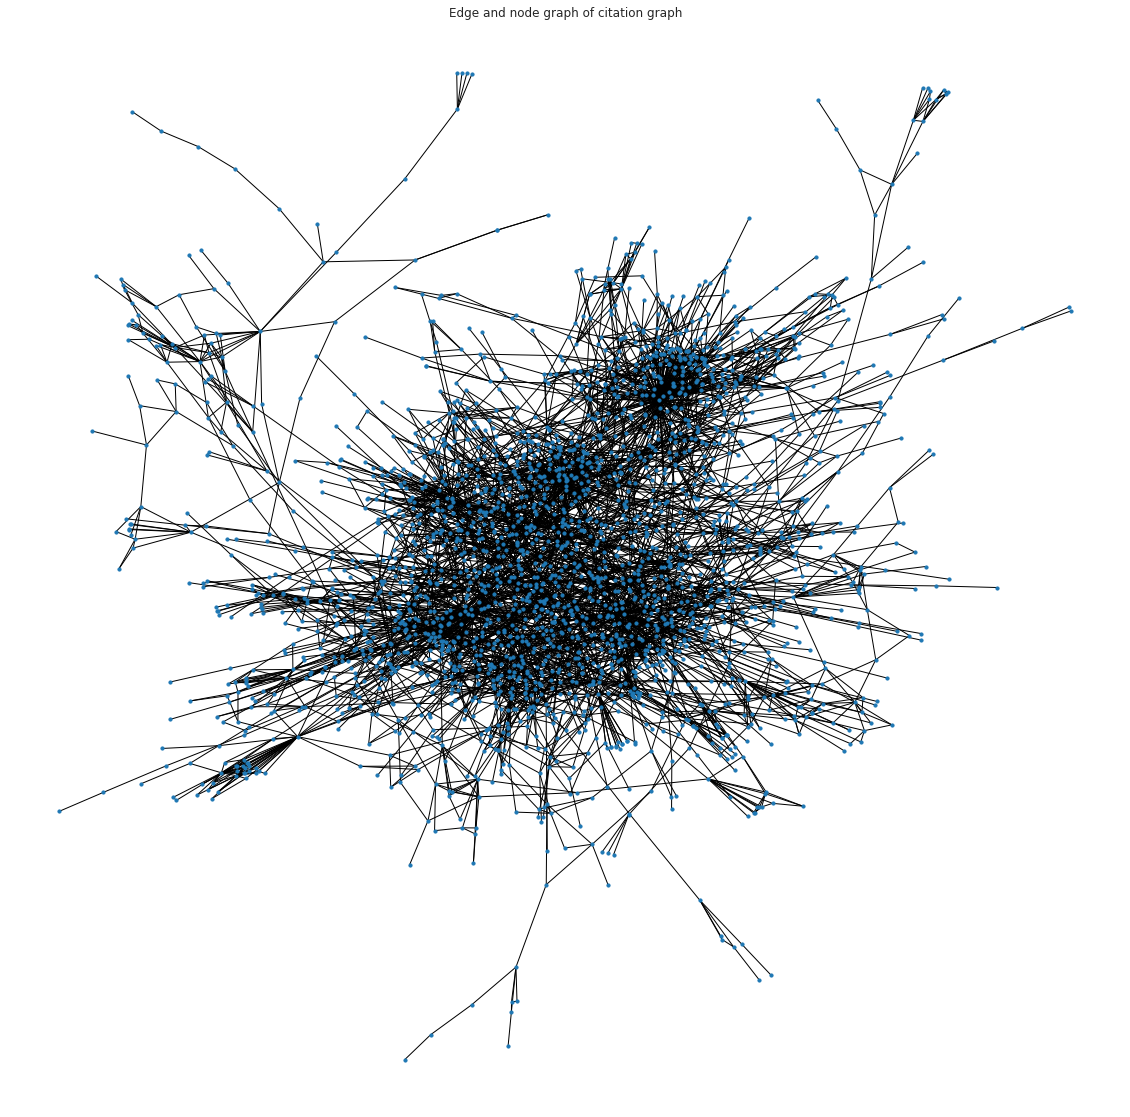

In [ ]:
from networkx.drawing.nx_pylab import draw_networkx, draw

# Plotting edge and node diagram of graph A
A_graph_plot = plt.subplots(1,1,figsize=(20,20))
plt.title('Edge and node graph of citation graph')
draw(A, pos, node_size=10, edgewidth=0.1, with_labels=False)

Here, we plot a histogram of the degree of every node in the graph.

In [ ]:
# degree sequence
degree_sequence = sorted([d for n, d in A.degree()], reverse=True)

# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

Text(0.5, 0, 'Degree')

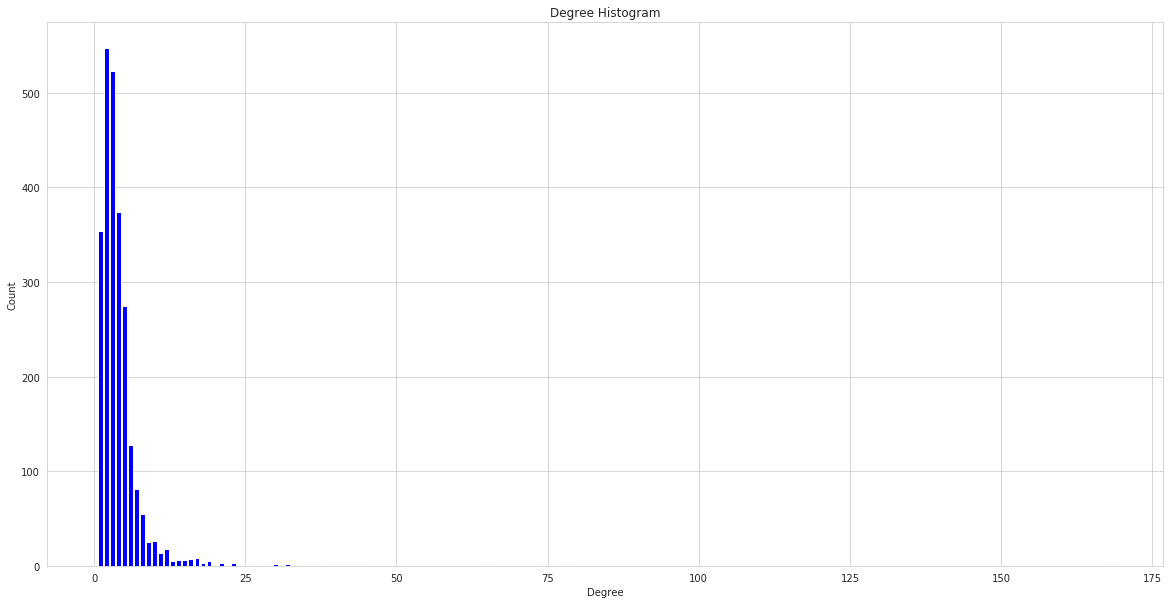

In [ ]:
# degree sequence
degree_sequence = sorted([d for n, d in A.degree()], reverse=True)

# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(20,10))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

The histogram shows that most of the nodes in our graph have only a couple of edges connecting them to other nodes, while very few nodes have a large number of connections. The literature refers to these as 'hubs', which are a common phenomenon in these kinds of netowrk/citation graphs.

### Centrality Measures

Here we compute three centrality measures for each node on our graph. The top 10 in each category are reported, and correlation plots of every node are plotted below.

#### i. Degree

In [ ]:
# Printing the degree of each node in the graph
deg_lst = pd.DataFrame([])
deg_lst['Degree'] = pd.DataFrame(A.degree()).iloc[:,1]

# Finding papers with the most citation edges
deg_lst_ord = deg_lst.sort_values(by='Degree')

# Top ten papers/nodes by degree
pd.DataFrame(deg_lst_ord.iloc[-10:,0])
deg_df = pd.DataFrame([])
deg_df['Node'] = list(deg_lst_ord.iloc[-10:,0].index)
deg_df['Degree'] = deg_lst_ord.iloc[-10:].values
deg_df

,Node,Degree
0,541,33
1,925,34
2,77,36
3,1893,40
4,1490,42
5,1671,44
6,1845,65
7,1562,74
8,270,78
9,1244,168


#### ii. Betweenness Centrality

In [ ]:
from networkx import betweenness_centrality

# Calculating betweenness centrality of each node
bet_cent_lst = betweenness_centrality(A)

In [ ]:
import operator

# Ordering dictionary by betweenness centrality value
bet_cent_lst_ord = sorted(bet_cent_lst.items(), key=operator.itemgetter(1))

# Top ten papers/nodes by BC-value
pd.DataFrame(bet_cent_lst_ord[-10:])
betcent_df = pd.DataFrame([])
betcent_df['Node'] = pd.DataFrame(bet_cent_lst_ord[-10:])[0]
betcent_df['Betweenness Centrality'] = pd.DataFrame(bet_cent_lst_ord[-10:])[1]
betcent_df

,Node,Betweenness Centrality
0,94,0.048997
1,77,0.059229
2,1671,0.062361
3,925,0.075027
4,976,0.080670
5,270,0.090730
6,1562,0.100799
7,1893,0.106139
8,1845,0.149720
9,1244,0.276228


#### iii. Pagerank

In [ ]:
# Computing pagerank of nodes in the graph
from  networkx import pagerank
pge_rnk_lst = pagerank(A)

In [ ]:
# Ordering dictionary by betweenness centrality value
pge_rnk_lst_ord = sorted(pge_rnk_lst.items(), key=operator.itemgetter(1))

# Top ten papers/nodes by pagerank value
pagerank_df = pd.DataFrame([])
pagerank_df['Node'] = pd.DataFrame(pge_rnk_lst_ord[-10:])[0]
pagerank_df['Pagerank'] = pd.DataFrame(pge_rnk_lst_ord[-10:])[1]
pagerank_df

,Node,Pagerank
0,925,0.002761
1,541,0.002879
2,77,0.002918
3,1490,0.003044
4,1893,0.003473
5,1671,0.003960
6,270,0.005515
7,1845,0.005849
8,1562,0.006851
9,1244,0.013308


#### Highly central nodes

Using the indices computed above, we will study the nodes that are reported as highly central by each of the three centrality measures.

In [ ]:
# Finding common elements in top ten lists by centrality measures
a = set(pd.DataFrame(pge_rnk_lst_ord[-10:])[0]).intersection(set(pd.DataFrame(bet_cent_lst_ord[-10:])[0]))
high_cent_idx = a.intersection(set(deg_lst_ord[-10:].index))
print('Highly central nodes by three centrality measures: {}'.format(high_cent_idx))

Highly central nodes by three centrality measures: {1893, 1671, 77, 270, 1845, 1562, 1244, 925}


#ffe600
#ffe600
#ffe600
#ffe600
#ffe600
#ffe600
#ff6600
#ffe600
#ffe600
#ff9d00
#ffe600
#ffe600
#ff0000
#ffe600
#ffe600
#ffe600
#ff6600
#ffe600
#ffe600
#ffe600


<BarContainer object of 20 artists>

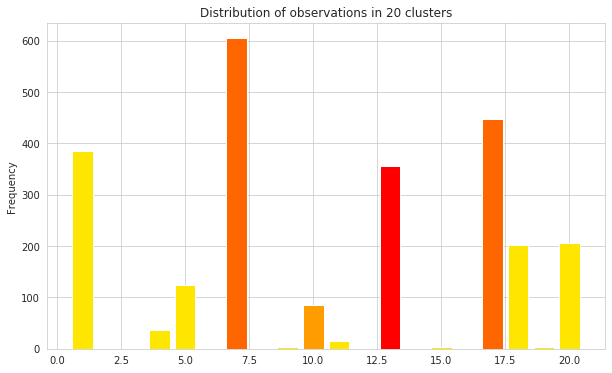

In [ ]:
from sklearn.cluster import KMeans

# Calculating distribution of cluster sizes
opt_labels = opt_kmeans.labels_
opt_labels_bar = np.unique(opt_labels, return_counts=True)

# Defining colour of bars according to number of highly central nodes in the cluster
high_cent_col_lst = ['#ffe600', '#ff9d00', '#ff6600', '#ff0000']
high_cent_bar_colors = ['#ffe600']*len(np.unique(opt_kmeans.labels_))

for i, col in enumerate(high_cent_bar_colors):
   high_cent_bar_colors[i] = high_cent_col_lst[list(opt_kmeans.labels_[list(high_cent_idx)]).count(i)]

# Plotting distribution of data in each cluster
clust_dist_plot = plt.subplots(1,1,figsize=(10,6))

plt.title('Distribution of observations in {} clusters'.format(len(np.unique(opt_kmeans.labels_))))
plt.ylabel('Frequency')
plt.bar(opt_labels_bar[0]+1,opt_labels_bar[1], color = high_cent_bar_colors)



The above plot shows that the top 8 highly central nodes are mostly in larger clusters. This suggests that papers are cited and cite more often when there is a large number of papers with similar content.

### Correlation between centrality measures

There are eight nodes that appear as the most central nodes by each of the three centrality measures. This is to be expected, as there is high correlation between these scores. The correlation of the measures is plotted here:

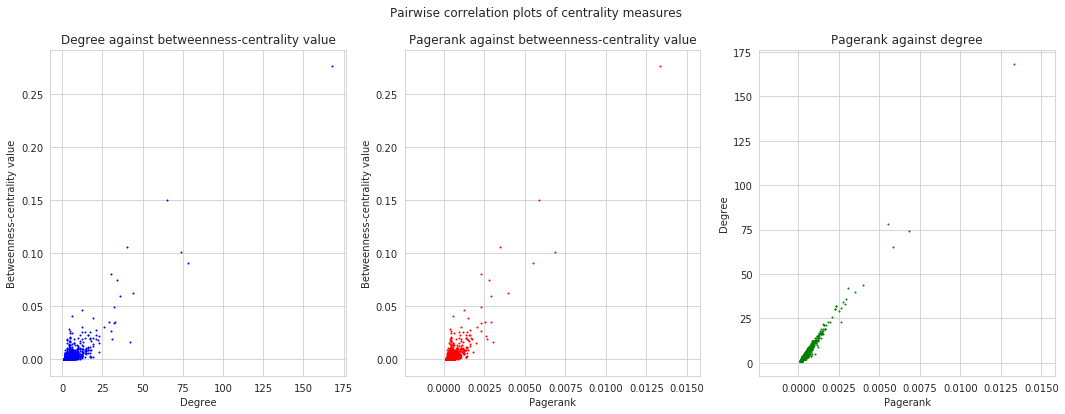

In [ ]:
# Creating three pairwise plots to show correlation between centrality scores


# Plotting...
corr_plots = plt.subplots(1,3,figsize=(18,6))
plt.suptitle('Pairwise correlation plots of centrality measures')

# Degree against betweenness centrality
plt.subplot(131)
plt.title('Degree against betweenness-centrality value')
plt.xlabel('Degree')
plt.ylabel('Betweenness-centrality value')
plt.scatter(deg_lst, [i for i in bet_cent_lst.values()], s=1, c='b')

# Pagerank against betweenness centrality
plt.subplot(132)
plt.title('Pagerank against betweenness-centrality value')
plt.xlabel('Pagerank')
plt.ylabel('Betweenness-centrality value')
plt.scatter([j for j in pge_rnk_lst.values()], [i for i in bet_cent_lst.values()], s=1, c='r')

# Pagerank against degree
plt.subplot(133)
plt.title('Pagerank against degree')
plt.xlabel('Pagerank')
plt.ylabel('Degree')
plt.scatter([j for j in pge_rnk_lst.values()], deg_lst, s=1, c='g')

Let $A = (a_{i,j})$ be the adjacency matrix of a directed graph. Then the PageRank centrality $x_{i}$ of node $i$ is given by: $$x_i = \alpha \sum_k \frac{a_{k,i}}{d_k} \, x_k + \beta$$ where $\alpha$ and $\beta$ are constants and $d_k$ is the out-degree of node $k$ if such degree is positive, or $d_k = 1$ if the out-degree of $k$ is null. The $d_k$ in the denominator of this sum weights the contribution of a node $k$ begatively if it links to many other nodes.

Clearly, if the degree of a node $i$ is high, there will be more non-zero contributions from the entries of row $i$ in the adjacency matrix, and so we would expect a positive linear correlation between pagerank centrality and degree.

The correlations observed here matches what can be found in the literature. Pagerank is a variant of EigenCentrality, which *Valente et al, (2010)* found to be highly correlated. The reasons they suggest are that both measures are symmetrized and rely, to some extent, on direct connections. Additionally, the weak, but still significant postiive correlation found between betweennes-centrality and pagerank, and the similar correlation between dgeree and betweenness-centrality are repeated in the results of the paper. 

The full paper can be found at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2875682/

## 1.3 Community detection on the citation graph

In [ ]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

# Generating indicies of each community
comm = greedy_modularity_communities(A)

In [ ]:
import random

# Printing the number of communities generated from the graph
k_star = len(comm)
print('Optimal number of communities:', k_star)

# Generating the right number of hex colour codes
r = lambda: random.randint(0,255)
col_lst2 = ['#%02X%02X%02X' % (r(),r(),r()) for i in range(0, len(comm))]

Optimal number of communities: 31


KeyboardInterrupt: ignored

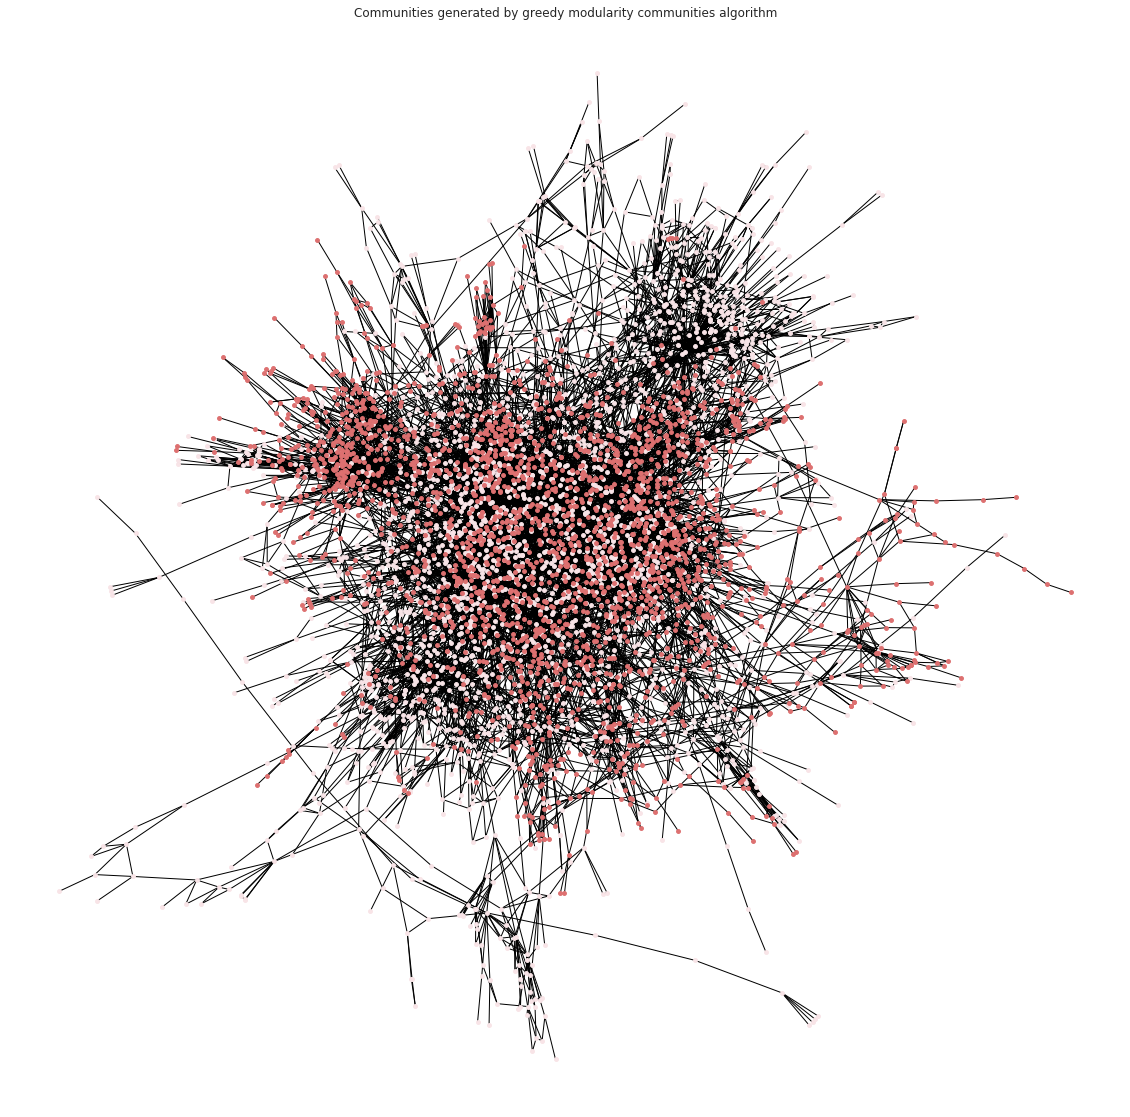

In [ ]:
# Visualising the communities on the erdge and node graph
from networkx.drawing.nx_pylab import draw_spring
import random

plt.clf

# Plotting edge and node diagram of graph A
A_graph_plot = plt.subplots(1,1,figsize=(20,20))
plt.title('Communities generated by greedy modularity communities algorithm')

# Plotting each community with a different colour
for i, col in enumerate(col_lst2):
  draw(A, pos, node_size=15, with_labels=False, edgewidth=0.001, node_list=comm[i], node_color=col_lst2[i])

In [ ]:
for i, grp in enumerate(comm):
  print('Size of community {}: {}'.format(i, len(grp)))

Size of community 0: 391
Size of community 1: 216
Size of community 2: 214
Size of community 3: 205
Size of community 4: 197
Size of community 5: 171
Size of community 6: 141
Size of community 7: 119
Size of community 8: 108
Size of community 9: 96
Size of community 10: 92
Size of community 11: 92
Size of community 12: 84
Size of community 13: 82
Size of community 14: 54
Size of community 15: 38
Size of community 16: 25
Size of community 17: 24
Size of community 18: 21
Size of community 19: 14
Size of community 20: 13
Size of community 21: 13
Size of community 22: 13
Size of community 23: 11
Size of community 24: 10
Size of community 25: 9
Size of community 26: 8
Size of community 27: 8
Size of community 28: 6
Size of community 29: 5
Size of community 30: 4


### Top 30 Nodes According to Degree and Pagerank

No handles with labels found to put in legend.


Text(0, 0.5, 'Frequency of "top 30 nodes" in cluster')

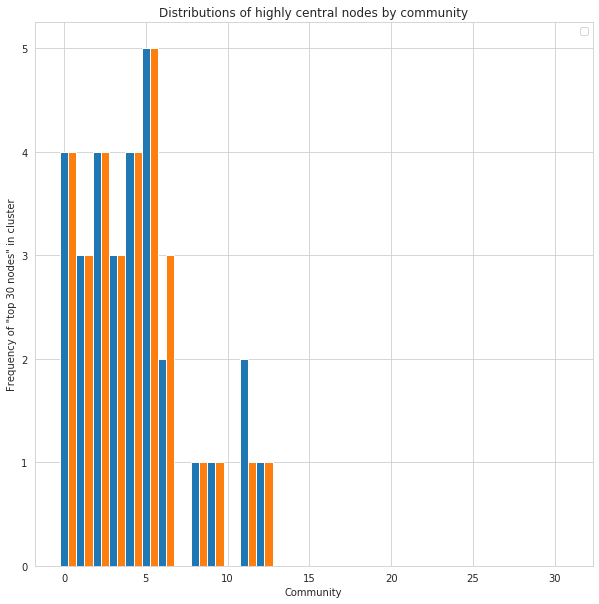

In [ ]:
# Distribution of highy central nodes by cluster

# Converting community index output into amenable format for AMI
comm_idx = [0]*opt_kmeans.labels_
for i in range(len(comm)):
  for j in comm[i]:
    comm_idx[j] = i

vec1 = [0]*30
vec2 = [0]*30
bar1 = np.zeros(31)
bar2 = np.zeros(31)
# Distribution of pagerank listed nodes across communities
for i, node in enumerate(pge_rnk_lst_ord[-30:]):
  vec1[i] = comm_idx[node[0]]
bar1[:len(np.bincount(np.array(vec1)))] = np.bincount(np.array(vec1))

# pge_rnk_lst_ord[-30:]
# deg_lst_ord[-30:]

# Distribution of degree listed nodes across communities
for i, node in enumerate(deg_lst_ord[-30:].index):
 vec2[i] = comm_idx[node]
bar2[:len(np.bincount(np.array(vec2)))] = np.bincount(np.array(vec2))

cent_plot = plt.figure(figsize=(10,10))

plt.title('Distributions of highly central nodes by community')

# Width of a bar 
width = 1       

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
#plt.xticks((np.unique(comm_idx)+width)/2, ['{}'.format(i) for i in range(0,31)])

# Finding the best position for legends and putting it
plt.legend(loc='best')

plt.bar(range(0,31), bar1, width/2, label='Blue bar label')
plt.bar(np.unique(comm_idx) + width/2, bar2, width/2, label='Orange bar label')
plt.xlabel('Community')
plt.ylabel('Frequency of "top 30 nodes" in cluster')

The distribution of highly central nodes is nearly identical for Pagerank and degree. This is as expected from the correlation graph displayed above, and the definition of these centrality measures. 

The histogram shows that the top 30 nodes are distributed over only half of the communities generated by the algorithm. This is due to the 'greedy' quality of the algorithm, which prioritises grouping as many nodes together as possible before moving on to the next community generation. This results in the mismatch in size of the later communities to the earlier communities.

## 1.4 Compare feature and graph clusterings

Here, we calculate the Adjusted Mutual Information (AMI) and Adjusted Rand Index (ARI) to score the similarities between the two clustering methods executed above.

In [ ]:
# Converting community index output into amenable format for AMI
comm_idx = [0]*len(opt_kmeans.labels_)
for i in range(len(comm)):
  for j in comm[i]:
    comm_idx[j] = i

In [ ]:
# AMI and ARI scoring
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score
print('AMI of two clusterings: {}'.format(adjusted_mutual_info_score(opt_kmeans.labels_, comm_idx)))
print('ARI of two clusterings: {}'.format(adjusted_rand_score(opt_kmeans.labels_, comm_idx)))

AMI of two clusterings: 0.10372238156169113
ARI of two clusterings: 0.043537493934742634


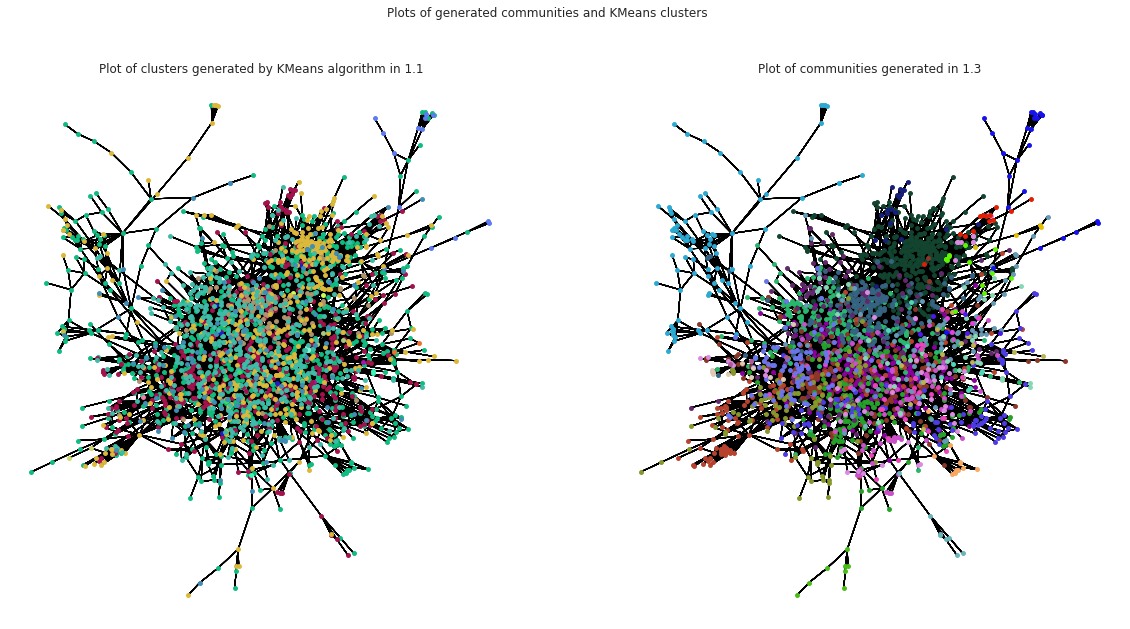

In [ ]:
# Plotting edge and node diagram of graph A
A_graph_plot = plt.subplots(1,2,figsize=(20,10))
plt.suptitle('Plots of generated communities and KMeans clusters')

# Creating node list from KMeans array
node_lsts = [0]*len(np.unique(opt_kmeans.labels_))
for i in np.unique(opt_kmeans.labels_):
  node_lsts[i] = np.where(opt_kmeans.labels_ == i)[0].tolist()

# Generating the right number of hex colour codes
r = lambda: random.randint(0,255)
col_lst = ['#%02X%02X%02X' % (r(),r(),r()) for i in range(0, len(comm))]
col_lst2 = ['#%02X%02X%02X' % (r(),r(),r()) for i in range(0, len(node_lsts))]

# Plotting each community with a different colour
plt.subplot(1,2,1)
plt.title('Plot of clusters generated by KMeans algorithm in 1.1')
for i, col in enumerate(col_lst2):
  draw(A, pos, node_size=15, with_labels=False, edgewidth=0.05, nodelist=node_lsts[i], node_color=col)

# Plotting each community with a different colour
plt.subplot(1,2,2)
plt.title('Plot of communities generated in 1.3')
for i, col in enumerate(col_lst):
  draw(A, pos, node_size=15, with_labels=False, edgewidth=0.05, nodelist=comm[i], node_color=col)

The two clustering algorithms look to be very different, picking out different clusters. However, there are some similiarities in the graphs, as the community in the top right of the main bunch of nodes is picked out by both, as are the side communities on the right and left of the main bunch.

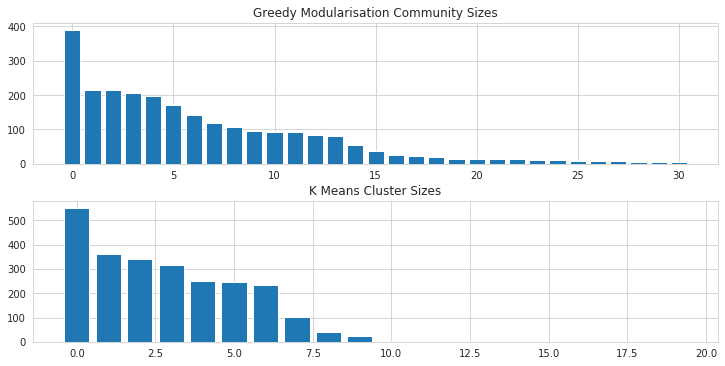

In [ ]:
# Histogram of sizes of clusters/communities
plt.subplots(2, 1, figsize=(10,5))

plt.subplot(2,1,1)
plt.bar([i for i in range(0, len(comm))], [len(i) for i in comm])
plt.title('Greedy Modularisation Community Sizes')

plt.subplot(2,1,2)
plt.title('K Means Cluster Sizes')
plt.bar([i for i in range(0, len(np.bincount(opt_kmeans.labels_)))], list(np.sort(np.bincount(opt_kmeans.labels_))[::-1]))
plt.tight_layout(pad=2/5)

# Task 2: Image Classification

First we visualise some of the classes of the dataset to understand how we can train our classifiers.

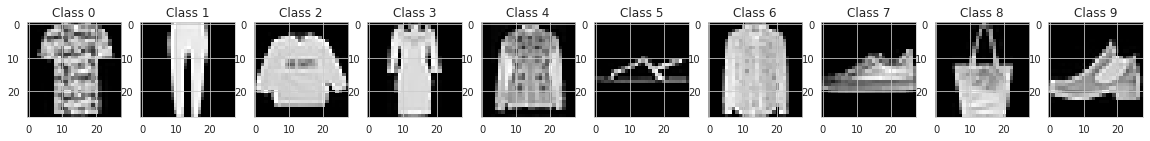

In [ ]:
# Visualising each of the ten centroids
plt.subplots(1,10,figsize=(20,5))

for i in range(0,10):
  plt.subplot(2,10,i+1)
  z = np.array(fash_mnist_train.iloc[(fash_mnist_train['label'].values == i).argmax(), 1:]).reshape(28,28)
  plt.title('Class {}'.format(fash_mnist_train.iloc[(fash_mnist_train['label'].values == i).argmax()]['label']))

  # make a meshgrid
  xs, ys = np.meshgrid(28,28)

  # display the image on the axes
  plt.imshow(z, cmap=plt.cm.gray)
# show the plot
plt.show()

Each row of the data holds pixel values of a 28 by 28 pixel grid, with the first element labelling what item the pixels encode.

## Task 2.1: Unsupervised Clustering of the Image Dataset

Here we utilise the k-means function written in 1.1 to cluster the Fashion-MNIST dataset into k classes in an unsupervised manner. Similar to 1.1, this is done for all values of k between k=2 and k=30.

To avoid the randomness in the clustering, we use a seed for each of these values to ensure easy reproducability of the clustering.

Finished Clustering [2/30]
Finished Clustering [3/30]
Finished Clustering [4/30]
Finished Clustering [5/30]
Finished Clustering [6/30]
Finished Clustering [7/30]
Finished Clustering [8/30]
Finished Clustering [9/30]
Finished Clustering [10/30]
Finished Clustering [11/30]
Finished Clustering [12/30]
Finished Clustering [13/30]
Finished Clustering [14/30]
Finished Clustering [15/30]
Finished Clustering [16/30]
Finished Clustering [17/30]
Finished Clustering [18/30]
Finished Clustering [19/30]
Finished Clustering [20/30]
Finished Clustering [21/30]
Finished Clustering [22/30]
Finished Clustering [23/30]
Finished Clustering [24/30]
Finished Clustering [25/30]
Finished Clustering [26/30]
Finished Clustering [27/30]
Finished Clustering [28/30]
Finished Clustering [29/30]
Finished Clustering [30/30]


OverflowError: ignored

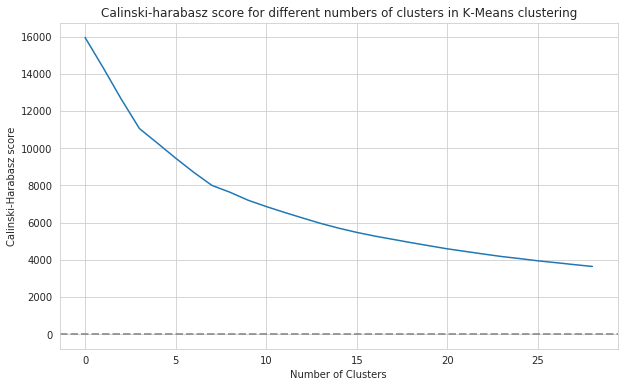

In [ ]:
image_kmeans = kmeans_chscore(fash_mnist_train.iloc[:,1:], 2, 30, 10, 42)

# Saving clustering object for reproducibility
import pickle
with open("/content/drive/My Drive/Methods for Data Science/image_kmeans.pickle", 'wb') as f:
    pickle.dump(image_kmeans, f)

# with open(clust30, ‘rb’) as f:
#     image_kmeans = pickle.load(f)

The elbow plot above does not show any evidence of the clustering finding the 10 'ground truth' classes in the dataset. As the dataset is balaned, we would expect each cluster in k=10 clustering to be of the same size. As the bar chart below shows, this is not the case.

In [ ]:
# Using k=10 as our clustering
image_10means = KMeans(n_clusters=10, random_state=4073).fit(fash_mnist_train.iloc[:,1:])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([7568, 2584, 4360, 9060, 7394, 6551, 2339, 9680, 7604, 2860]))


<BarContainer object of 10 artists>

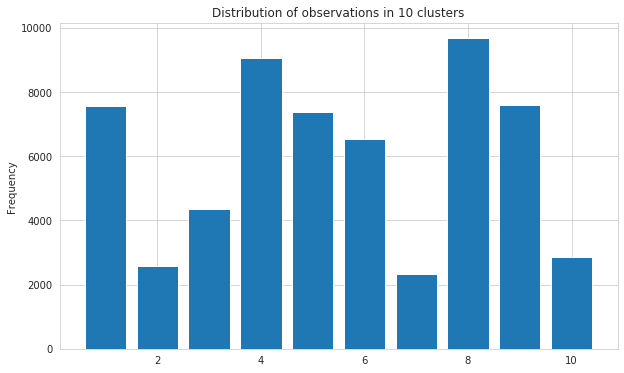

In [ ]:
# Calculating distribution of cluster sizes
image_10means_labels = image_10means.labels_
k10_labels_bar = np.unique(image_10means_labels, return_counts=True)
print(k10_labels_bar)
# Plotting distribution of data in each cluster
clust_dist_plot = plt.subplots(1,1,figsize=(10,6))

plt.title('Distribution of observations in {} clusters'.format(len(np.unique(image_10means.labels_))))
plt.ylabel('Frequency')
plt.bar(k10_labels_bar[0]+1, k10_labels_bar[1])

To understand how well the clustering has recovered the  may help to visualise the 'ground truth' make up of these 10 clusters, which is plotted below.

In [ ]:
# Creating node list from KMeans array
k10_idx = [0]*len(np.unique(image_10means.labels_))
groundtruths = [0]*len(np.unique(image_10means.labels_))

for i in np.unique(image_10means.labels_):
  # Getting indices of cluster elements
  k10_idx[i] = np.where(image_10means.labels_ == i)[0].tolist()

  # Finding ground truth labels of cluster indices
  groundtruths[i] = np.bincount(fash_mnist_train.iloc[k10_idx[i], :]['label'])

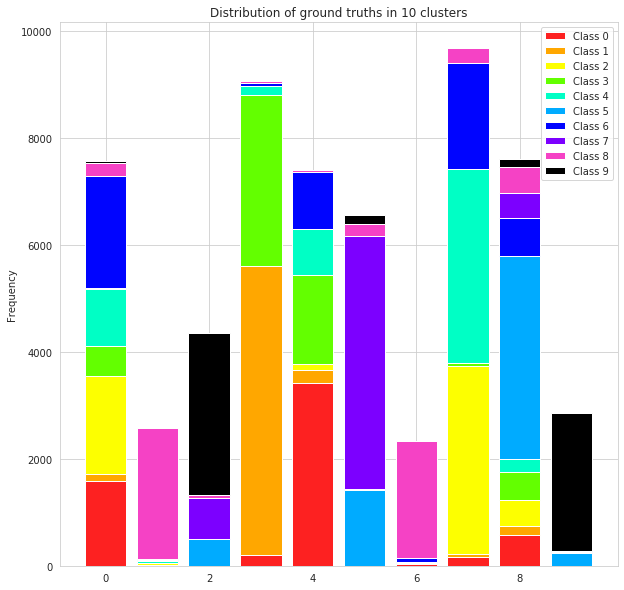

In [ ]:
# Plotting distribution of labels in each cluster
clust_dist_plot = plt.subplots(1,1,figsize=(10,10))

ps = [0]*10

color_map = ['#fd2121', '#ffa700', '#fdff00', '#63ff00', '#00ffc5', '#00abff', '#0004ff', '#7c00ff', '#f542c5', '#000000']

plt.title('Distribution of ground truths in {} clusters'.format(len(np.unique(image_10means.labels_))))
plt.ylabel('Frequency')
bars = np.transpose(groundtruths)[0]
for i in range(0,10):
  if i == 0:
    plt.bar(np.unique(image_10means.labels_), np.transpose(groundtruths)[i], color=color_map[i], label='Class {}'.format(i))
  else:
    plt.bar(np.unique(image_10means.labels_), np.transpose(groundtruths)[i], bottom = bars, color=color_map[i], label='Class {}'.format(i))
    bars = np.add(bars, np.transpose(groundtruths)[i]).tolist()
plt.legend()

#### Gap Statistic

The above bar plot shows that every cluster consists of multiple 'ground truth' labels. Clearly then, the clustering has not managed to recover the labels of the items from the images. We also compute the gap statistic for each $k \in [3,\dots, 30]$. The *Gap Statistic* was defined by *R. Tibshirani et al.*, in a paper available [here](https://statweb.stanford.edu/~gwalther/gap), along with teo methods for its implementation. As there is not a function already available for its implementation, we write this ourselves. The statistic is defined as follows:

Let 
$$
D_r = \sum_{i,i' \in C_r} d_{ii'}
$$
be the sum of pairwise distances in cluster $C_r$ and set, 
$$
W_k = \sum^k_{r=1}\frac{1}{2n_r}D_r.
$$
So that $W_K$ is the pooled within-cluster sum of squares around the cluster means. Hence we define the gap statistic
$$
Gap_n(k) = E_n^* \{log(W_k)\} - log\{W_k\}
$$

where $E_n^*$ denotes the expectation under a sample of size $n$ from a reference distribution.

### Other clustering performance scores

In [ ]:
kmeans_dbindex(fash_mnist_train, 2, 30, randint=3993, verbose=True)

Finished Clustering [2/30]
Finished Clustering [3/30]
Finished Clustering [4/30]
Finished Clustering [5/30]
Finished Clustering [6/30]
Finished Clustering [7/30]
Finished Clustering [8/30]
Finished Clustering [9/30]
Finished Clustering [10/30]
Finished Clustering [11/30]
Finished Clustering [12/30]
Finished Clustering [13/30]
Finished Clustering [14/30]
Finished Clustering [15/30]
Finished Clustering [16/30]


KeyboardInterrupt: ignored

#### kNN Classifier

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# Creating k=10 clustering object for kNN classification
k10_class = KMeans(n_clusters=10, random_state=4073).fit(fash_mnist_train.iloc[:,1:])

To use the k-means clustering for classification, we compute an input's closest centroid, and calculate the average of the 'true' label of the datapoints assigned to that cluster. This is a similar partitioning of the sample space as a decision tree. 

In [ ]:
def KMeansKNNClassifier(dataX, KMeansClust):
  from numpy.linalg import norm
  from numpy import argmin

  X = np.array(dataX.iloc[:,1:])
  predictions = [0]*len(X)
  centroid_class = [0]*len(KMeansClust.cluster_centers_)

  # Computing class for each centroid
  for i, centroid in enumerate(KMeansClust.cluster_centers_):
    centroid_class[i] = np.bincount(fash_mnist_train.loc[KMeansClust.labels_ == i]['label']).argmax()
 
  # Looping over observations in test set
  for i, x in enumerate(X):
    # Compute closest centroid
    norm_vec = [0]*len(KMeansClust.cluster_centers_)
    for j, centroid in enumerate(KMeansClust.cluster_centers_):
      norm_vec[j] = norm(np.array(x) - np.array(centroid))
    
    # Getting average of label in chosen cluster around pred_centroid to make prediciton
    predictions[i] = centroid_class[argmin(norm_vec)]
    if i % 1000 == 0:
      print('Predicted [{}/{}] \t Predicted: {}'.format(i+1, len(dataX), predictions[i]))

  return predictions

In [ ]:
kmeans_pred = KMeansKNNClassifier(fash_mnist_test, k10_class)

Predicted [1/10000] 	 Predicted: 0
Predicted [1001/10000] 	 Predicted: 4
Predicted [2001/10000] 	 Predicted: 8
Predicted [3001/10000] 	 Predicted: 0
Predicted [4001/10000] 	 Predicted: 6
Predicted [5001/10000] 	 Predicted: 1
Predicted [6001/10000] 	 Predicted: 9
Predicted [7001/10000] 	 Predicted: 6
Predicted [8001/10000] 	 Predicted: 7
Predicted [9001/10000] 	 Predicted: 5


In [ ]:
# Computing performance scores on the test set
test_array = kmeans_pred == fash_mnist_test['label']
test_array.value_counts()

True     5522
False    4478
Name: label, dtype: int64

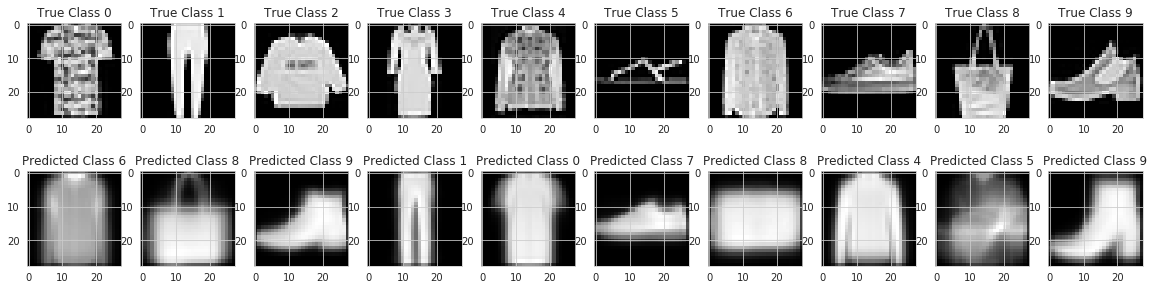

In [ ]:
# Visualising each of the ten centroids
plt.subplots(2,10,figsize=(20,5))

centroid_class = [0]*len(k10_class.cluster_centers_)

for i, centroid in enumerate(k10_class.cluster_centers_):
  plt.subplot(2,10,i+1)
  z = np.array(fash_mnist_train.iloc[(fash_mnist_train['label'].values == i).argmax(), 1:]).reshape(28,28)
  plt.title('True Class {}'.format(fash_mnist_train.iloc[(fash_mnist_train['label'].values == i).argmax()]['label']))

  # make a meshgrid
  xs, ys = np.meshgrid(28,28)

  # display the image on the axes
  plt.imshow(z, cmap=plt.cm.gray)

  plt.subplot(2,10,i+11)
  z = np.array(centroid.reshape(28,28))
  xs, ys = np.meshgrid(28,28)
  plt.imshow(z, cmap=plt.cm.gray)
  centroid_class[i] = np.bincount(fash_mnist_train.iloc[np.where(k10_class.labels_ == i)]['label']).argmax()
  plt.title('Predicted Class {}'.format(centroid_class[i]))
# show the plot
plt.show()

The visualisation of the centroids shows that the clustering is unable to find the 10 classes in the dataset, and shows a blurry 'average' of the images in each cluster. Only 8 of the labels are recovered, and two clusters are reported as the same class (class 8). This affects the performance of the classifier created from the clustering, as the recall score on those ommitted classes is immediately 0%.

Intuitively we can see that observations from Class 2 and Class 4 will be very close in the 784-dimensional pixelspace, and so are likely to be assigned to the same cluster. One would expect the first and fifth clusters to be assigned into one larger cluster, but at least they report the same predictions that one would expect.

In [ ]:
def PerformanceScores(pred, truelabels, model_name, verbose=True):

  ## Performance scores of the classifers classifier

  from sklearn.metrics import recall_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import f1_score

  scores = [0]*3

  # Calculating recall score
  test_recall = recall_score(truelabels, pred, average=None)
  scores[0] = test_recall

  # Calculating precision score
  test_precision = precision_score(truelabels, pred, average=None)
  scores[1] = test_precision

  # Calculating F1 score
  test_f1 = f1_score(truelabels, pred, average=None)
  scores[2] = test_f1

  # Printing...
  if verbose == True:
    print('Recall scores of the model on the test set:', test_recall)
    print('Precision scores of the model on the test set:', test_precision)
    print('F1 socres of the model on the test set:', test_f1)

  titles = ['Recall score', 'Precision score', 'F1 score']
  colors = ['#D81B60', '#1E88E5', '#FFC107']
  plt.subplots(1,3,figsize=(18,6))
  plt.suptitle('Performance scores of the {} model on test dataset'.format(model_name))
  # Visualising
  for i, score in enumerate(scores):
    plt.subplot(131+i)
    plt.title('{}'.format(titles[i]))
    plt.xlabel('Class number')
    plt.ylabel('Score')
    plt.bar([0,1,2,3,4,5,6,7,8,9], scores[i], color=colors[i])

In [ ]:
from sklearn.metrics import confusion_matrix

def ConfMat(pred, truelabels, model_name):
  # Confusion matrices for Predictor
  conf_mat = confusion_matrix(truelabels, pred, labels=[0,1,2,3,4,5,6,7,8,9], sample_weight=None)
  conf_mat = pd.DataFrame(conf_mat)

  # Plotting the recall of each model for each class
  conf_disp = plt.figure(figsize=(20,4))
  conf_disp.suptitle('Confusion matrices of the {} model on the test dataset'.format(model_name))

  # Plotting confusion matrix for each model
  sns.heatmap(conf_mat, annot=True, fmt='g', cmap=plt.cm.Reds)
  plt.xlabel('{} Prediction label'.format(model_name))
  plt.ylabel('True label')

Recall scores of the model on the test set: [0.581 0.913 0.    0.    0.606 0.632 0.348 0.749 0.765 0.928]
Precision scores of the model on the test set: [0.45820189 0.5882732  0.         0.         0.37851343 0.49568627
 0.28665568 0.71401335 0.94678218 0.75263585]
F1 socres of the model on the test set: [0.51234568 0.71551724 0.         0.         0.46597463 0.5556044
 0.31436314 0.73108834 0.84623894 0.83116883]


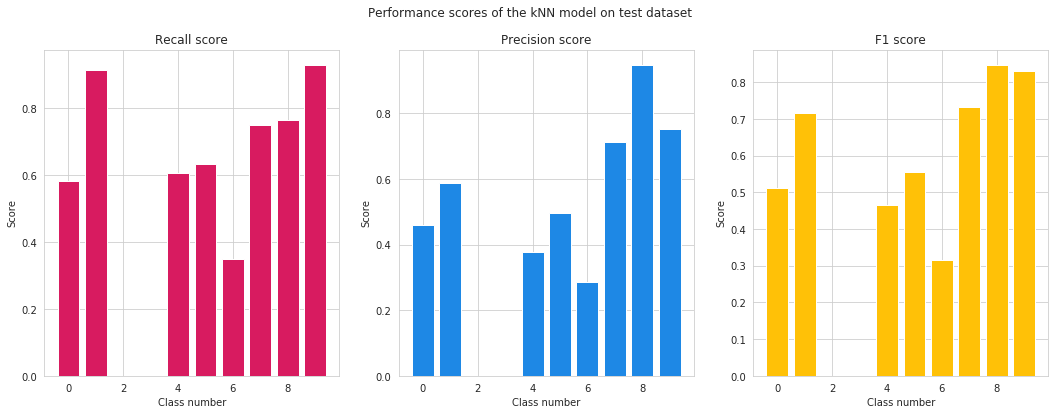

In [ ]:
PerformanceScores(kmeans_pred, fash_mnist_test['label'], 'kNN')

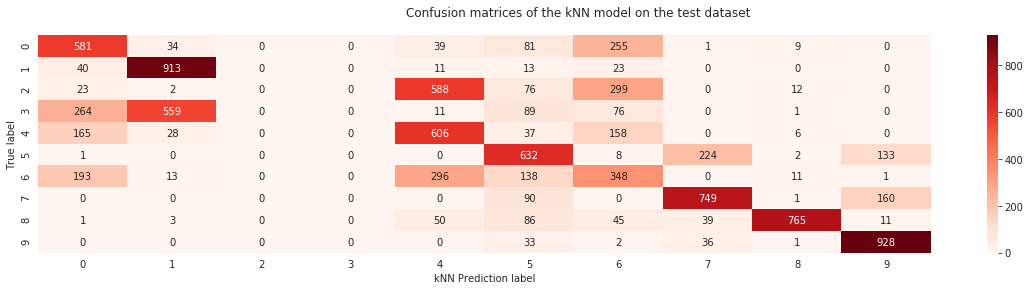

In [ ]:
ConfMat(kmeans_pred, fash_mnist_test['label'], 'kNN')

As expected, the recall on classes 2 and 3 is 0, which is reflected in the confusion matrix lacking any predictions for these classes. Additionally, the performance across the board is poor which reflects the cluster's underlying inability to recover the 'ground truth' classes.

## Task: 2.2 Supervised classification of the training set

#### 2.2.1 MLP neural network supervised classification

In [ ]:
#########################################################
## Initialising everything for neural network training ##
#########################################################

# Network architecture
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 30
batch_size = 128
learning_rate = 0.005
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assign labels
train_labels = list(fash_mnist_train['label'])
test_labels = list(fash_mnist_test['label'])

# prepare data
X_train = torch.from_numpy(fash_mnist_train.iloc[:,1:].values).float()
y_train = torch.from_numpy(np.array(train_labels))
X_test = torch.from_numpy(fash_mnist_test.iloc[:,1:].values).float()
y_test = torch.from_numpy(np.array(test_labels))

# loading data 
tor_train = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(tor_train, batch_size=batch_size)
tor_test = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(tor_test, batch_size=batch_size)

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc5 = nn.Linear(hidden_size, num_classes)

    # Using ReLU as the activation function
    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        out = F.relu(self.fc4(out))
        out = self.fc5(out)
        out = F.log_softmax(out)
        return out

In [ ]:
# Calling the neural network
learning_rate = 0.005
net001 = NeuralNet(input_size, hidden_size, num_classes)
net001 = net001.to(device)

# Defining loss as negative log-likelihood and optimiser as SGD
criterion = nn.NLLLoss()
optimiser001 = torch.optim.SGD(net001.parameters(), lr=learning_rate)

In [ ]:
total_step = len(train_loader)
loss_values_001 = []
in_sample_acc_001 = []

# Looping through the epochs
for epoch in range(num_epochs):

  # Model training
  net001.train()
  train_loss = np.zeros(len(train_loader))
  
  # Looping over train loader
  for i, (images, labels) in enumerate(train_loader, 0):
    
    total = 0.0
    correct = 0.0

    images = images.to(device)
    labels = labels.to(device)

    # Passing forward
    outputs = net001(images)
    loss = criterion(outputs, labels)
        
    # Propagating backwards and performing optimisation
    optimiser001.zero_grad()
    loss.backward()
    optimiser001.step()

    # update loss
    train_loss[i] = loss.item()

    # Computing in-sample accuracy for the model after the latest epoch
    net001.eval()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  in_sample_acc_001.append(correct/total)

  # Printing training statistics for current epoch
  print('Epoch [{}/{}] \t Training Loss: {:.6f} \t In-Sample Accuracy: {:.3f}'.format(epoch+1, num_epochs, np.mean(train_loss), correct/total))
  loss_values_001.append(np.mean(train_loss))
print('Finished Training')

Epoch [1/30] 	 Training Loss: 0.669692 	 In-Sample Accuracy: 0.771
Epoch [2/30] 	 Training Loss: 0.463763 	 In-Sample Accuracy: 0.792
Epoch [3/30] 	 Training Loss: 0.412348 	 In-Sample Accuracy: 0.771
Epoch [4/30] 	 Training Loss: 0.381429 	 In-Sample Accuracy: 0.844
Epoch [5/30] 	 Training Loss: 0.359655 	 In-Sample Accuracy: 0.844
Epoch [6/30] 	 Training Loss: 0.342477 	 In-Sample Accuracy: 0.833
Epoch [7/30] 	 Training Loss: 0.328598 	 In-Sample Accuracy: 0.865
Epoch [8/30] 	 Training Loss: 0.317342 	 In-Sample Accuracy: 0.865
Epoch [9/30] 	 Training Loss: 0.306766 	 In-Sample Accuracy: 0.865
Epoch [10/30] 	 Training Loss: 0.297523 	 In-Sample Accuracy: 0.885
Epoch [11/30] 	 Training Loss: 0.288542 	 In-Sample Accuracy: 0.865
Epoch [12/30] 	 Training Loss: 0.281074 	 In-Sample Accuracy: 0.854
Epoch [13/30] 	 Training Loss: 0.273259 	 In-Sample Accuracy: 0.885
Epoch [14/30] 	 Training Loss: 0.266573 	 In-Sample Accuracy: 0.885
Epoch [15/30] 	 Training Loss: 0.259557 	 In-Sample Accur

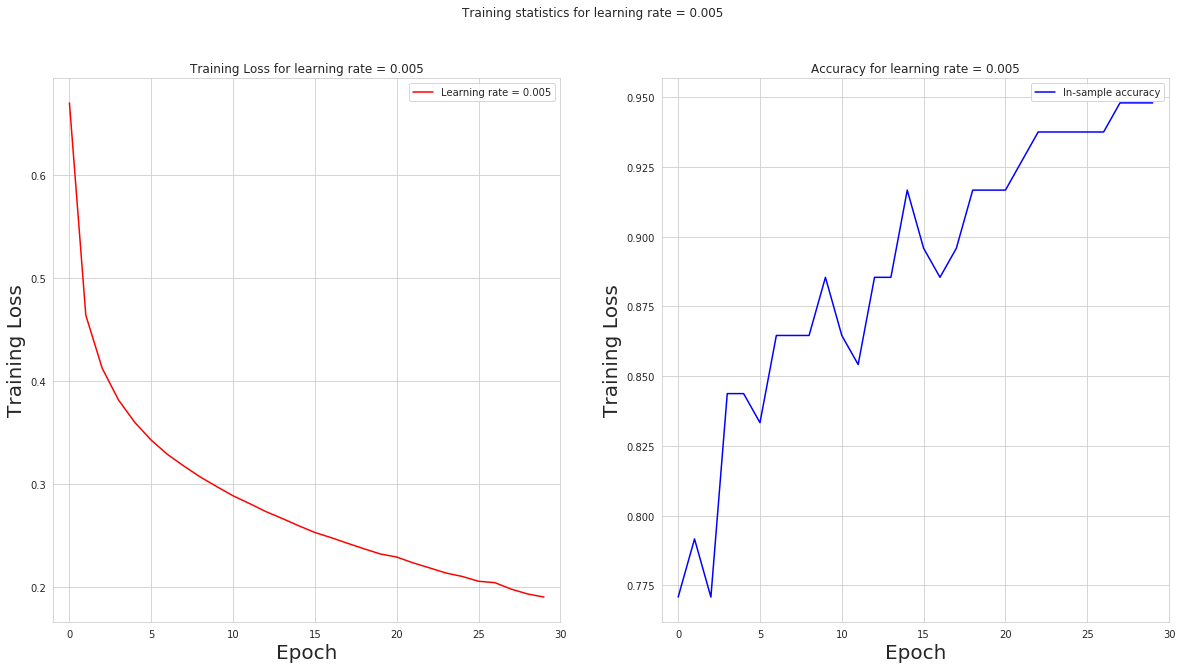

In [ ]:
# Plotting training stats for learning rate = 0.005
plt.figure(figsize=(20,10))
plt.suptitle('Training statistics for learning rate = 0.005')

plt.subplot(1,2,1)

plt.title('Training Loss for learning rate = 0.005')

plt.xlim(-1, num_epochs)

plt.ylabel('Training Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.plot(loss_values_001, label = 'Learning rate = 0.005', c = 'r')
plt.legend()


plt.subplot(1,2,2)

plt.title('Accuracy for learning rate = 0.005')

plt.xlim(-1, num_epochs)

plt.ylabel('Training Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.plot(in_sample_acc_001, label = 'In-sample accuracy', c = 'b')
plt.legend()

In [ ]:
# Computing accuracy on the test set
  net001.eval()
  
  # Grabbing Predicitions on the test set
  MLPpred = []
  for i, (images, labels) in enumerate(test_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = net001(images)
    _, hold = torch.max(outputs.data, 1)
    MLPpred = np.append(MLPpred, hold.cpu().detach())

In [ ]:
print('Accuracy of the regular neural net on the test set: {}%'.format((MLPpred == fash_mnist_test['label']).value_counts()[1]*100/len(MLPpred)))

Accuracy of the regular neural net on the test set: 87.69%


Recall scores of the model on the test set: [0.832 0.977 0.69  0.852 0.919 0.937 0.692 0.924 0.973 0.973]
Precision scores of the model on the test set: [0.82457879 0.98786653 0.86466165 0.93421053 0.69885932 0.97705944
 0.72918862 0.93807107 0.94649805 0.92140152]
F1 socres of the model on the test set: [0.82827277 0.98240322 0.76751947 0.89121339 0.79395248 0.95661052
 0.71010775 0.93098237 0.95956607 0.94649805]


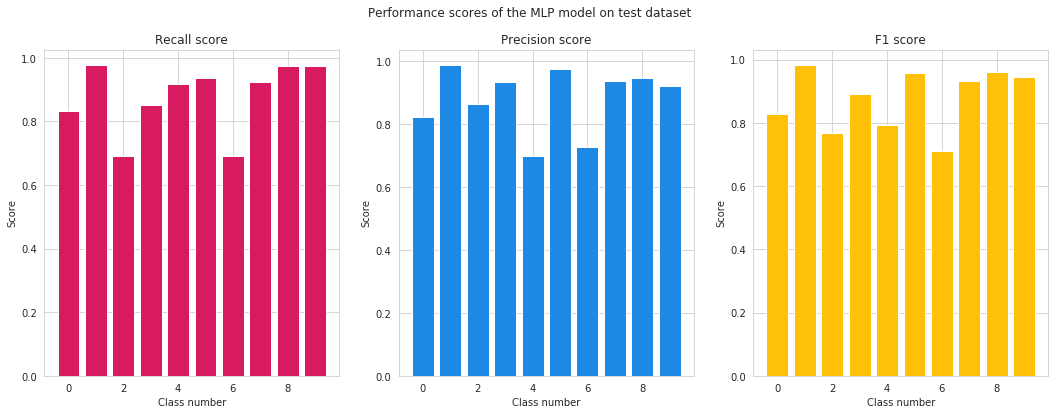

In [ ]:
PerformanceScores(MLPpred, fash_mnist_test['label'], 'MLP')

In [ ]:
from sklearn.metrics import confusion_matrix

def ConfMat(pred, truelabels, model_name):
  # Confusion matrices for Predictor
  conf_mat = confusion_matrix(truelabels, pred, labels=[0,1,2,3,4,5,6,7,8,9], sample_weight=None)
  conf_mat = pd.DataFrame(conf_mat)

  # Plotting the recall of each model for each class
  conf_disp = plt.figure(figsize=(20,4))
  conf_disp.suptitle('Confusion matrices of the {} model on the test dataset'.format(model_name))

  # Plotting confusion matrix for each model
  sns.heatmap(conf_mat, annot=True, fmt='g', cmap=plt.cm.Reds)

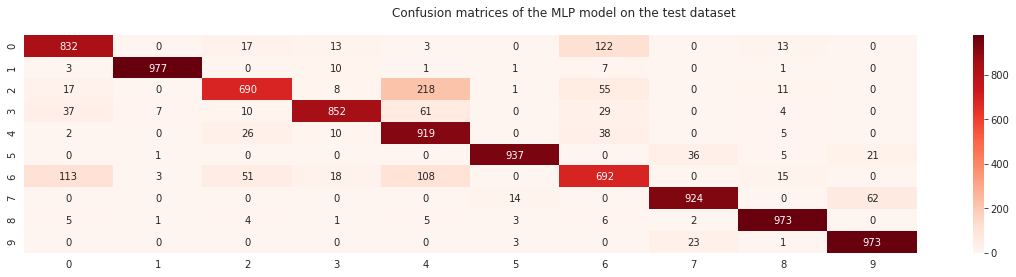

In [ ]:
ConfMat(MLPpred, fash_mnist_test['label'], 'MLP')

#### 2.2.2 Convolutional neural network (CNN) supervised classification

In [ ]:
#########################################################
###### Initialising everything for CNN training #########
#########################################################

# Network architecture
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 30
batch_size = 128
learning_rate = 0.005
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assign labels
train_labels = list(fash_mnist_train['label'])
test_labels = list(fash_mnist_test['label'])

X_train = torch.from_numpy(fash_mnist_train.iloc[:,1:].values).float()
y_train = torch.from_numpy(np.array(train_labels))
X_test = torch.from_numpy(fash_mnist_test.iloc[:,1:].values).float()
y_test = torch.from_numpy(np.array(test_labels))

# loading data 
tor_train = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(tor_train, batch_size=batch_size)
tor_test = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(tor_test, batch_size=batch_size)

In [ ]:
class ConvNeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)

        x = torch.randn(28,28).view(-1,1,28,28)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def convs(self, x):
      # Subsampling over 2x2
      x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
      x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))

      if self._to_linear is None:
        self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]

      return x

    # Using ReLU as the activation function
    def forward(self, x):
      x = x.resize(x.shape[0], 1, 28, 28)
      x = self.convs(x)
      x = x.view(-1, self._to_linear)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return F.log_softmax(x, dim=1)

In [ ]:
# Calling the CNN
learning_rate = 0.005
convnet = ConvNeuralNet(input_size, hidden_size, num_classes)
convnet = convnet.to(device)
                   
# Defining loss as negative log-likelihood and optimiser as SGD
criterion = nn.NLLLoss()
optimiserconv = torch.optim.SGD(convnet.parameters(), lr=learning_rate)

In [ ]:
total_step = len(train_loader)
loss_values_conv = []
in_sample_acc_conv = []

# Looping through the epochs
for epoch in range(num_epochs):

  # Model training
  convnet.train()
  train_loss = np.zeros(len(train_loader))
  
  # Looping over train loader
  for i, (images, labels) in enumerate(train_loader, 0):

    images = images.to(device)
    labels = labels.to(device)

    # Passing forward
    outputs = convnet(images)
    loss = criterion(outputs, labels)
        
    # Propagating backwards and performing optimisation
    optimiserconv.zero_grad()
    loss.backward()
    optimiserconv.step()

    # update loss
    train_loss[i] = loss.item()

    total = 0.0
    correct = 0.0
    # Computing in-sample accuracy for the model after the latest epoch
    outputs = convnet(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  in_sample_acc_conv.append(correct/total)

  # Printing training statistics for current epoch
  print('Epoch [{}/{}] \t Training Loss: {:.6f} \t In-Sample Accuracy: {:.3f}'.format(epoch+1, num_epochs, np.mean(train_loss), correct/total))
  loss_values_conv.append(np.mean(train_loss))
print('Finished Training')

Epoch [1/30] 	 Training Loss: 0.726108 	 In-Sample Accuracy: 0.812
Epoch [2/30] 	 Training Loss: 0.470652 	 In-Sample Accuracy: 0.854
Epoch [3/30] 	 Training Loss: 0.411257 	 In-Sample Accuracy: 0.854
Epoch [4/30] 	 Training Loss: 0.376232 	 In-Sample Accuracy: 0.865
Epoch [5/30] 	 Training Loss: 0.353206 	 In-Sample Accuracy: 0.885
Epoch [6/30] 	 Training Loss: 0.335882 	 In-Sample Accuracy: 0.896
Epoch [7/30] 	 Training Loss: 0.321802 	 In-Sample Accuracy: 0.917
Epoch [8/30] 	 Training Loss: 0.310442 	 In-Sample Accuracy: 0.917
Epoch [9/30] 	 Training Loss: 0.300745 	 In-Sample Accuracy: 0.917
Epoch [10/30] 	 Training Loss: 0.291667 	 In-Sample Accuracy: 0.917
Epoch [11/30] 	 Training Loss: 0.283953 	 In-Sample Accuracy: 0.917
Epoch [12/30] 	 Training Loss: 0.276776 	 In-Sample Accuracy: 0.917
Epoch [13/30] 	 Training Loss: 0.270252 	 In-Sample Accuracy: 0.927
Epoch [14/30] 	 Training Loss: 0.263875 	 In-Sample Accuracy: 0.938
Epoch [15/30] 	 Training Loss: 0.258142 	 In-Sample Accur

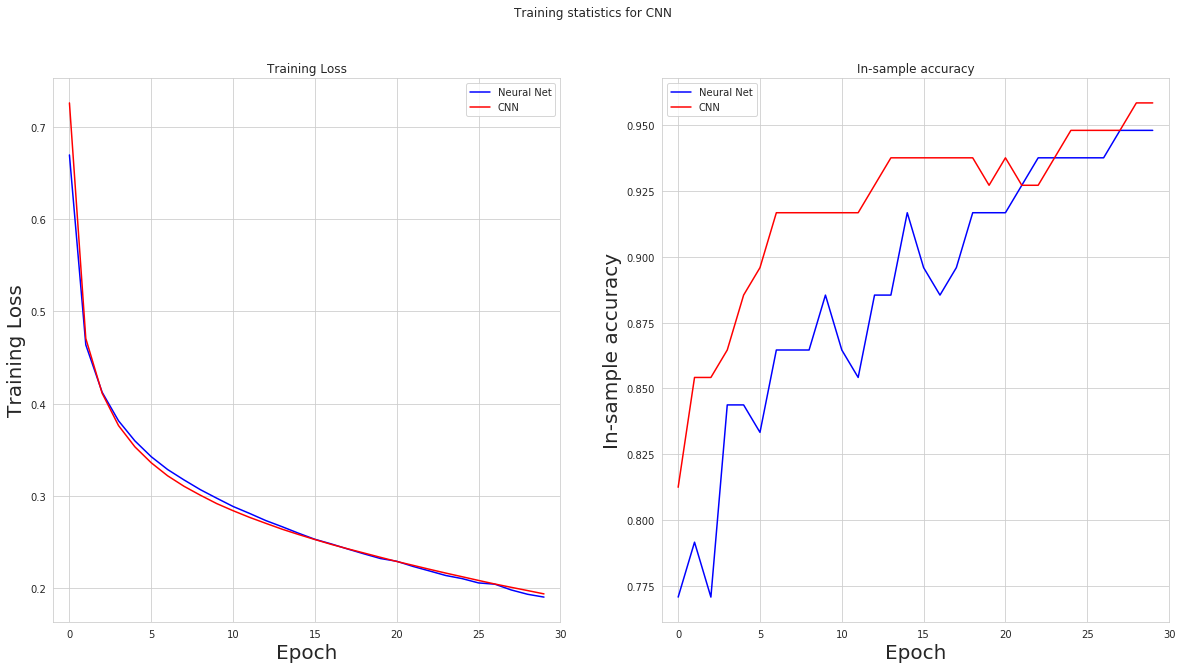

In [ ]:
# Plotting training stats for CNN
plt.figure(figsize=(20,10))
plt.suptitle('Training statistics for CNN')

plt.subplot(1,2,1)

plt.title('Training Loss')

plt.xlim(-1, num_epochs)

plt.ylabel('Training Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.plot(loss_values_001, label = 'Neural Net', c = 'b')
plt.plot(loss_values_conv, label = 'CNN', c = 'r')
plt.legend()


plt.subplot(1,2,2)

plt.title('In-sample accuracy')

plt.xlim(-1, num_epochs)

plt.ylabel('In-sample accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.plot(in_sample_acc_001, label = 'Neural Net', c = 'b')
plt.plot(in_sample_acc_conv, label = 'CNN', c = 'r')
plt.legend()

In [ ]:
# Computing accuracy on the test set
  convnet.eval()
  
  # Grabbing Predicitions on the test set
  convpred = np.array([])
  for i, (images, labels) in enumerate(test_loader):
    # Passing to colab's GPUs
    images = images.to(device)
    labels = labels.to(device)
    
    outputs = convnet(images)
    _, hold = torch.max(outputs.data, 1)
    convpred = np.append(convpred, hold.cpu().detach())

In [ ]:
print('Accuracy of the MLP on the test set: {}%'.format((MLPpred == fash_mnist_test['label']).value_counts()[1]*100/len(MLPpred)))
print('Accuracy of the CNN on the test set: {}%'.format((convpred == fash_mnist_test['label']).value_counts()[1]*100/len(convpred)))

Accuracy of the MLP on the test set: 87.69%
Accuracy of the CNN on the test set: 89.46%


Recall scores of the CNN on the test set: [0.844 0.976 0.829 0.899 0.886 0.957 0.676 0.93  0.971 0.978]
Precision scores of the CNN on the test set: [0.84063745 0.98885512 0.83822042 0.91084093 0.78755556 0.97553517
 0.75027747 0.94994893 0.971      0.93409742]
F1 socres of the CNN on the test set: [0.84231537 0.98238551 0.83358472 0.90488173 0.83388235 0.9661787
 0.71120463 0.93986862 0.971      0.9555447 ]


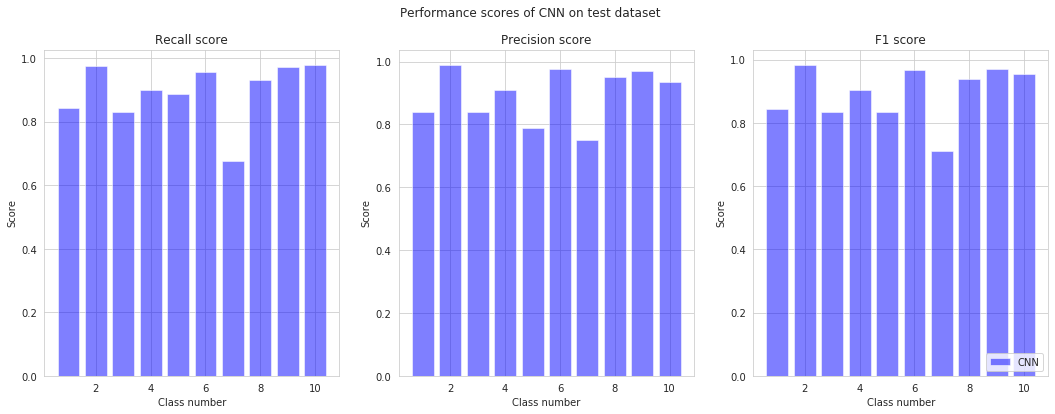

In [ ]:
# Computing scores on the test data
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

CNNscores = [[],[],[]]

# Calculating recall score
CNNtest_recall = recall_score(fash_mnist_test['label'], convpred, average=None)
CNNscores[0] = CNNtest_recall

# Calculating precision score
CNNtest_precision = precision_score(fash_mnist_test['label'], convpred, average=None)
CNNscores[1] = CNNtest_precision

# Calculating F1 score
CNNtest_f1 = f1_score(fash_mnist_test['label'], convpred, average=None)
CNNscores[2] = CNNtest_f1

# Printing...
print('Recall scores of the CNN on the test set:', CNNtest_recall)
print('Precision scores of the CNN on the test set:', CNNtest_precision)
print('F1 socres of the CNN on the test set:', CNNtest_f1)

titles = ['Recall score', 'Precision score', 'F1 score']
colors = ['#D81B60', '#1E88E5', '#FFC107']
plt.subplots(1,3,figsize=(18,6))
plt.suptitle('Performance scores of CNN on test dataset')

# Visualising
for i, score in enumerate(CNNscores):
  plt.subplot(131+i)
  plt.title('{}'.format(titles[i]))
  plt.xlabel('Class number')
  plt.ylabel('Score')
  plt.bar([1,2,3,4,5,6,7,8,9,10], CNNscores[i], color='blue', alpha=0.5, label='CNN')
plt.legend(loc='lower right')

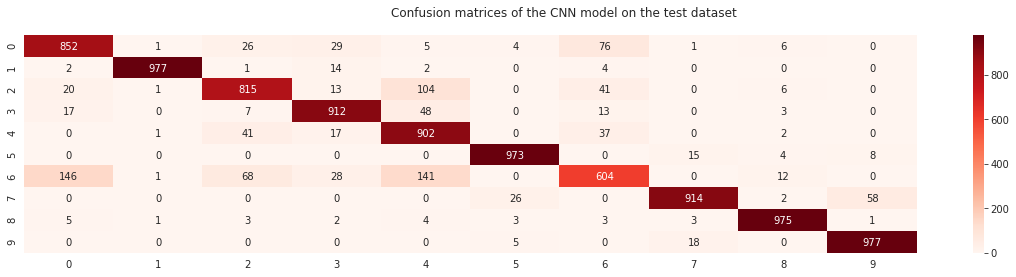

In [ ]:
ConfMat(convpred, fash_mnist_test['label'], 'CNN')

At first glance the CNN appears to have performed similarly to the MLP on the test set. A direct comparison is made in the next section.

### 2.2.3 Comparisons of the classifiers

#### MLP and CNN models

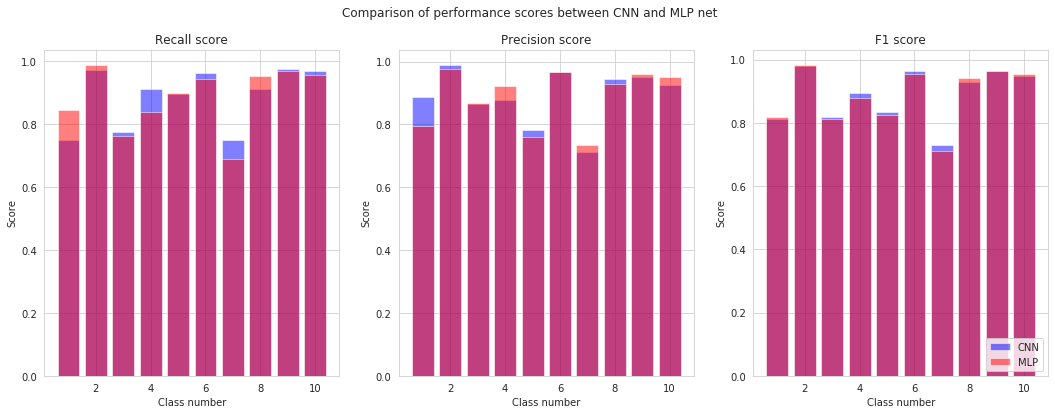

In [ ]:
plt.subplots(1,3,figsize=(18,6))
plt.suptitle('Comparison of performance scores between CNN and MLP net')

# Visualising
for i, score in enumerate(CNNscores):
  plt.subplot(131+i)
  plt.title('{}'.format(titles[i]))
  plt.xlabel('Class number')
  plt.ylabel('Score')
  plt.bar([1,2,3,4,5,6,7,8,9,10], CNNscores[i], color='blue', alpha=0.5, label='CNN')
  plt.bar([1,2,3,4,5,6,7,8,9,10], scores[i], color='red', alpha=0.5, label='MLP')
plt.legend(loc='lower right')

The CNN model improves apon the MLP model's scores across most of the classes. This is to be expected, as with the convolutional layers we have given the model the ability to learn patterns in the images which is incredibly useful for identifying the classes of the clothes. The fully connected hidden layers are much better at dealing with these learned features as inputs, rather than the pixel data of the images.

#### Supervised Models and kNN Classifier

<Figure size 432x288 with 0 Axes>

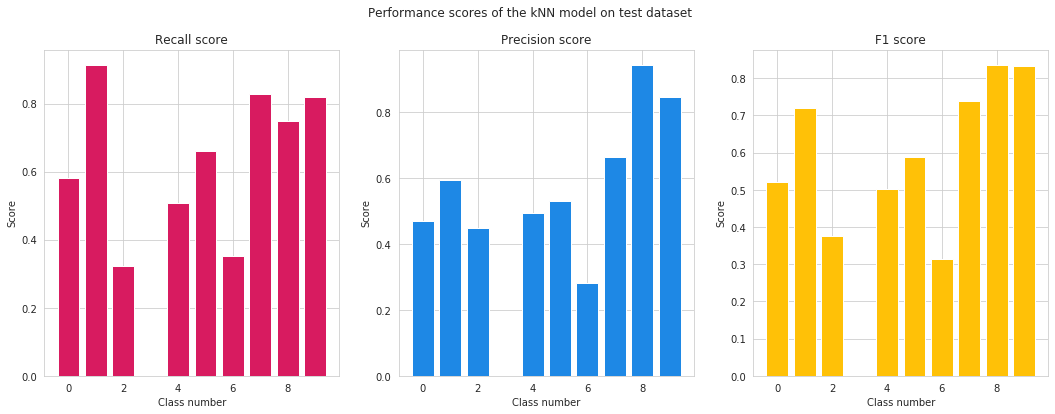

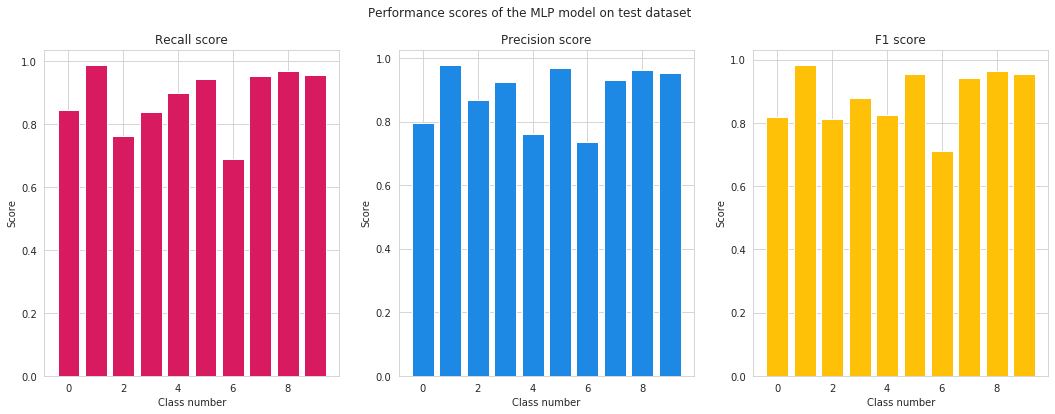

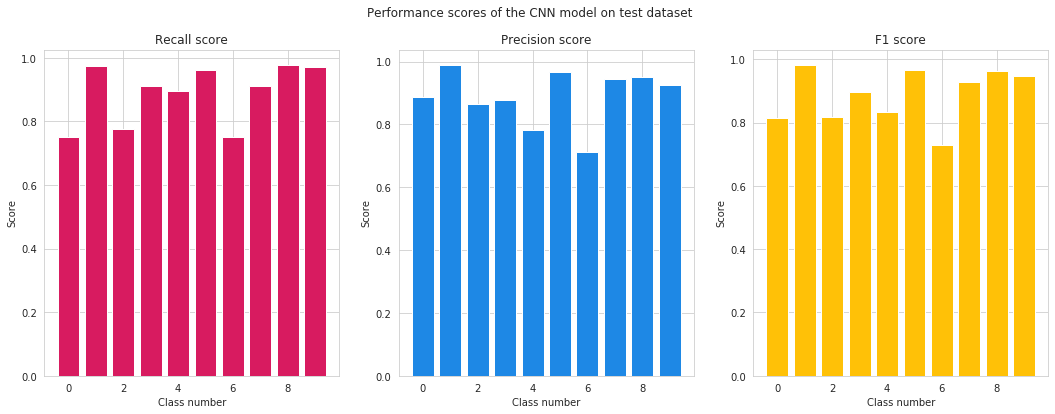

In [ ]:
# Plotting performance scores of each trained classifier
plt.suptitle('Performance scores of each trained classifier')
classifier_names = ['kNN', 'MLP', 'CNN']
model_preds = [kmeans_pred, MLPpred, convpred]

for i in range(0,3):
  PerformanceScores(model_preds[i], fash_mnist_test['label'], classifier_names[i], verbose=False)

<Figure size 432x288 with 0 Axes>

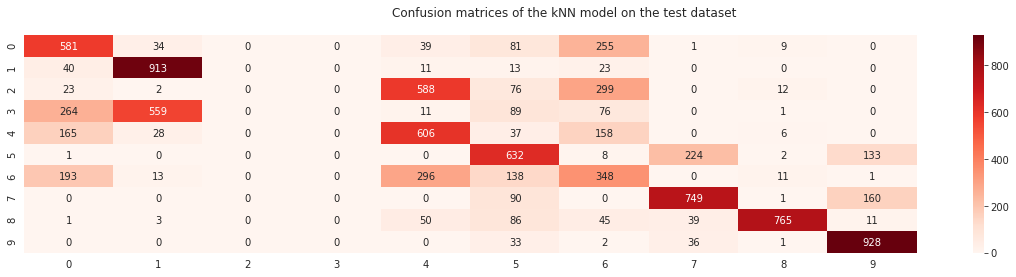

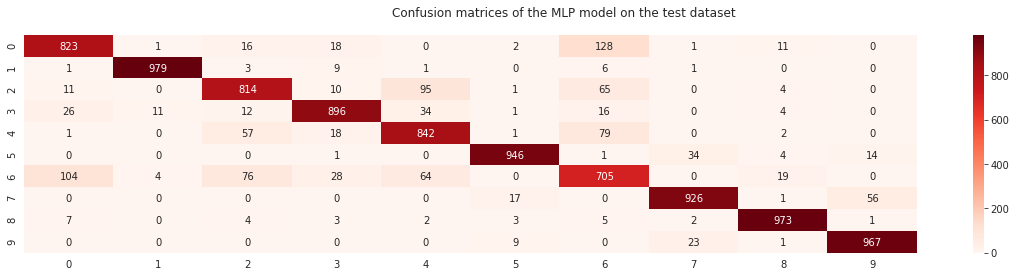

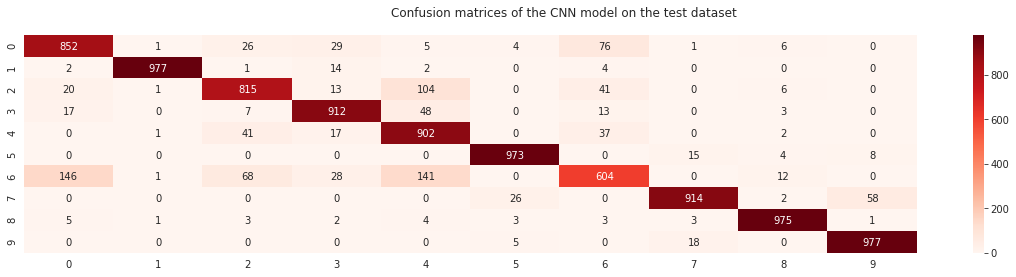

In [ ]:
# Plotting confusion matrices of each trained classifier
plt.suptitle('Performance scores of each trained classifier')
classifier_names = ['kNN', 'MLP', 'CNN']
model_preds = [kmeans_pred, MLPpred, convpred]

for i in range(0,3):
  ConfMat(model_preds[i], fash_mnist_test['label'], classifier_names[i])

Of the three classifiers trained here, the CNN performs best on the test set in all metrics, on each classes except class 6. From the visualisation at the beginning of this section, we can see that this class corresponds to shirts. Visually, these images are very similar to that of Class 0 (T-shirts) and Class 4 (Sweatshirts), and so by incentivising the learning of visual features, the CNN instead learns the similarity of these classes. The confusion matrix of the CNN (bottom of figure) supports this interpretation, as the CNN mis-classifies Class 6 as Classes 0 and 4 the most.

Since the model has learned the similarities between these classes, we may want to incentivise the images pathway through the network to be distinct for each of the 'similar' classes. This can be achieved by adding an extra hidden layer with dropout regularisation to ensure the model does not over fit to the classes in the training set.

#### Improving performace of CNN to 90% accuracy on the test set

Throughout the training of the CNN model, we have chosen not to standardise the image vector inputs, despite this being standard practise for other types of input. This is because the nature of this dataset relies on the relationships *between* pixels, which the CNN is then trained to learn. As each 'column' of the images is distributed on the same domain ($(0, 255)$ greyscale), this choice is justified.

In [ ]:
#########################################################
###### Initialising values for CNN training #########
#########################################################

# Network architecture
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 30
batch_size = 128
learning_rate = 0.01
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assign labels
train_labels = list(fash_mnist_train['label'])
test_labels = list(fash_mnist_test['label'])

# prepare data
X_train = torch.from_numpy(fash_mnist_train.iloc[:,1:].values).float()
y_train = torch.from_numpy(np.array(train_labels))
X_test = torch.from_numpy(fash_mnist_test.iloc[:,1:].values).float()
y_test = torch.from_numpy(np.array(test_labels))

# loading data 
tor_train = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(tor_train, batch_size=batch_size)
tor_test = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(tor_test, batch_size=batch_size)

In defining the CNN to be tuned, we add an extra fully-connected hidden layer and dropout regularisation to two of the hidden layers, with probability p which is to be tuned.

In [ ]:
class ConvNeuralNetDrop(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, p1):
        super().__init__()

        # Dropout probabilities p1, p2
        self.p1 = p1
        self.dropout = nn.Dropout(p=p1)
        #self.p2 = p2

        # Convolution layers
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)

        x = torch.randn(28,28).view(-1,1,28,28)
        self._to_linear = None
        self.convs(x)

        # Fully connected layers
        self.fc1 = nn.Linear(self._to_linear, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,84)
        self.fc4 = nn.Linear(84, 10)
    
    def convs(self, x):
      # Subsampling over 2x2
      x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
      x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))

      if self._to_linear is None:
        self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]

      return x

    # Using ReLU as the activation function
    def forward(self, x):
      x = x.resize(x.shape[0], 1, 28, 28)
      x = self.convs(x)

      x = x.view(-1, self._to_linear)

      x = F.relu(self.fc1(x))
      x = self.dropout(x)

      x = F.relu(self.fc2(x))
      #x = F.dropout(x, p = self.p2, training=True)

      x = F.relu(self.fc3(x))

      x = self.fc4(x)
      return F.log_softmax(x, dim=1)

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
skf.split(fash_mnist_train.iloc[:,1:], fash_mnist_train['label'])

<generator object _BaseKFold.split at 0x7f06529b06d0>

In [ ]:
######### Looping over cross validation to create K train/test loaders #########

train_loader = [0]*5
val_loader = [0]*5

for k, (train_split, test_split) in enumerate(skf.split(fash_mnist_train.iloc[:,1:], fash_mnist_train['label'])):

  # Assigning current train/test split for cross validation
  curr_train = fash_mnist_train.loc[train_split]
  curr_val = fash_mnist_train.loc[test_split]
  train_labels = list(curr_train['label'])
  val_labels = list(curr_val['label'])

  X_train = torch.from_numpy(curr_train.iloc[:,:-1].values).float()
  y_train = torch.from_numpy(np.array(train_labels))
  X_val = torch.from_numpy(curr_val.iloc[:,:-1].values).float()
  y_val = torch.from_numpy(np.array(val_labels))

  # Train loader for current train split
  tor_train = torch.utils.data.TensorDataset(X_train, y_train)
  train_loader[k] = torch.utils.data.DataLoader(tor_train, batch_size=batch_size)

  # Validation loader for current validation split
  tor_val = torch.utils.data.TensorDataset(X_val, y_val)
  val_loader[k] = torch.utils.data.DataLoader(tor_val, batch_size=batch_size)
  print('Train/Test loaders created [{}/{}]'.format(k+1, 5))
print('Finished Creating Loaders')

################################################################################

Train/Test loaders created [1/5]
Train/Test loaders created [2/5]
Train/Test loaders created [3/5]
Train/Test loaders created [4/5]
Train/Test loaders created [5/5]
Finished Creating Loaders


In [ ]:
##############################################
#             Tuning dropout rate            #
##############################################

# Defining grid of probabilities to search over
droprategrid1 = [0, 0.2, 0.4, 0.6, 0.8]
droprate_acc = [0]*len(droprategrid1)


# Looping over grid of proposed dropout rates
for i, dropoutrate1 in enumerate(droprategrid1):

  cross_val_acc = [0]*5
  
  # Looping over k cross validation folds
  for k in range(0,5):
    
    # Calling the net with dropout = p, defining loss as cross entropy and optimiser as SGD
    netdrop = ConvNeuralNetDrop(input_size, hidden_size, num_classes, p1=dropoutrate1)
    criterion = nn.NLLLoss()
    optimiserdrop = torch.optim.SGD(netdrop.parameters(), lr=0.005)   
    netdrop = netdrop.to(device)

    # Training model...
    for epoch in range(num_epochs):
      
      # Model training
      netdrop.train()
      train_loss = np.zeros(len(train_loader[k]))
      
      # Looping over train loader
      acc, tot = 0,0
      for j, (images, labels) in enumerate(train_loader[k], 0):
        # Passing variables to colab's GPUs
        images = images.to(device)
        labels = labels.to(device)

        # Passing forward
        outputs = netdrop(images)
        loss = criterion(outputs, labels.long())
        
        # Propagating backwards and performing optimisation
        optimiserdrop.zero_grad()
        loss.backward()
        optimiserdrop.step()

        _, pred = torch.max(outputs.data, 1)
        acc += len(pred[pred == labels]) 
        tot += len(pred == labels)

      print('Training epoch [{}/{}] \t Dropout rate = {} \t In-sample accuracy: {:.2f}%'.format(epoch+1, num_epochs, dropoutrate1, (acc/tot)*100))
        
    # Computing validation accuracy for the model after the latest crossval split
    total = 0.0
    correct = 0.0
    for val_images, val_labels in val_loader[k]:
      
      netdrop.eval()
      val_images = val_images.to(device)
      val_labels = val_labels.to(device)

      outputs = netdrop(val_images)
      _, predicted = torch.max(outputs.data, 1)
      correct += len(predicted[predicted == val_labels])

    cross_val_acc[k] = correct/12000

    # Printing training statistics for cross val split
    print('Droprate = {} \t Cross-val split [{}/{}] \t Validation Accuracy: {:.3f}%'.format(dropoutrate1, k+1, len(cross_val_acc), (cross_val_acc[k])*100))
        
  droprate_acc[i] = np.mean(cross_val_acc)
  print('Droprate_acc[{}]: {:.2f}%'.format(i, droprate_acc[i]*100))
    

TypeError: ignored

In [ ]:
# for i, d in enumerate(droprate_acc):
#   print('Droprate = {} validation accuracy = {:.2f}%'.format(droprategrid1[i],d*100))

# Calling and training net with highest validation accuracy
netdropopt = ConvNeuralNetDrop(input_size, hidden_size, num_classes, p1=0.2)
criterion = nn.NLLLoss()
optimiserdropopt = torch.optim.SGD(netdropopt.parameters(), lr=0.005)   
netdropopt = netdropopt.to(device)

total_step = len(train_loader)
loss_values_conv = []
in_sample_acc_conv = []

# Looping through the epochs
for epoch in range(num_epochs):

  # Model training
  netdropopt.train()
  train_loss = np.zeros(len(train_loader))
  
  # Looping over train loader
  for i, (images, labels) in enumerate(train_loader):

    images = images.to(device)
    labels = labels.to(device)

    # Passing forward
    outputs = netdropopt(images)
    loss = criterion(outputs, labels)
        
    # Propagating backwards and performing optimisation
    optimiserdropopt.zero_grad()
    loss.backward()
    optimiserdropopt.step()

    # update loss
    train_loss[i] = loss.item()

    total = 0.0
    correct = 0.0
    # Computing in-sample accuracy for the model after the latest epoch
    outputs = netdropopt(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  in_sample_acc_conv.append(correct/total)

  # Printing training statistics for current epoch
  print('Epoch [{}/{}] \t Training Loss: {:.6f} \t In-Sample Accuracy: {:.2f}%'.format(epoch+1, num_epochs, np.mean(train_loss), (correct/total)*100))
  loss_values_conv.append(np.mean(train_loss))
print('Finished Training')


# Computing accuracy on the test set
netdropopt.eval()
optpred = np.array([])
for images, labels in test_loader:
  images = images.to(device)
  labels = labels.to(device)

  
  outputs = netdropopt(images)
  _, predicted = torch.max(outputs.data, 1)
  # Adding number of correct predictions
  correct += len(predicted[predicted == labels])
  # Saving predictions for full score report
  optpred = np.append(optpred, predicted.cpu().detach())

print('Accuracy of the dropout CNN model on the test set: {:.2f}%'.format((correct/100)))

Epoch [1/30] 	 Training Loss: 0.861105 	 In-Sample Accuracy: 73.96%
Epoch [2/30] 	 Training Loss: 0.574831 	 In-Sample Accuracy: 82.29%
Epoch [3/30] 	 Training Loss: 0.506009 	 In-Sample Accuracy: 79.17%
Epoch [4/30] 	 Training Loss: 0.460571 	 In-Sample Accuracy: 84.38%
Epoch [5/30] 	 Training Loss: 0.430979 	 In-Sample Accuracy: 89.58%
Epoch [6/30] 	 Training Loss: 0.405516 	 In-Sample Accuracy: 89.58%
Epoch [7/30] 	 Training Loss: 0.392771 	 In-Sample Accuracy: 85.42%
Epoch [8/30] 	 Training Loss: 0.377353 	 In-Sample Accuracy: 90.62%
Epoch [9/30] 	 Training Loss: 0.366024 	 In-Sample Accuracy: 89.58%
Epoch [10/30] 	 Training Loss: 0.353974 	 In-Sample Accuracy: 89.58%
Epoch [11/30] 	 Training Loss: 0.345300 	 In-Sample Accuracy: 88.54%
Epoch [12/30] 	 Training Loss: 0.338503 	 In-Sample Accuracy: 89.58%
Epoch [13/30] 	 Training Loss: 0.332713 	 In-Sample Accuracy: 87.50%
Epoch [14/30] 	 Training Loss: 0.326440 	 In-Sample Accuracy: 87.50%
Epoch [15/30] 	 Training Loss: 0.321420 	 I

Using a dropout probability of 0.2 on an additional hidden layer of the CNN increased the validation accuracy to 88.5%. When this model was then trained on the full data set, it returned an in-sample accuracy of 94.8%, and an accuracy of 90% on the test set. The full performance scores for the Dropout-CNN model are plotted below.

Recall scores of the Optimised CNN on the test set: [0.847 0.98  0.852 0.896 0.868 0.95  0.681 0.938 0.976 0.972]
Precision scores of the Optimised CNN on the test set: [0.83695652 0.98098098 0.82960078 0.91803279 0.82041588 0.97636177
 0.74344978 0.94366197 0.96825397 0.93731919]
F1 socres of the Optimised CNN on the test set: [0.84194831 0.98049025 0.84065121 0.90688259 0.84353741 0.96300051
 0.71085595 0.94082247 0.97211155 0.95434462]


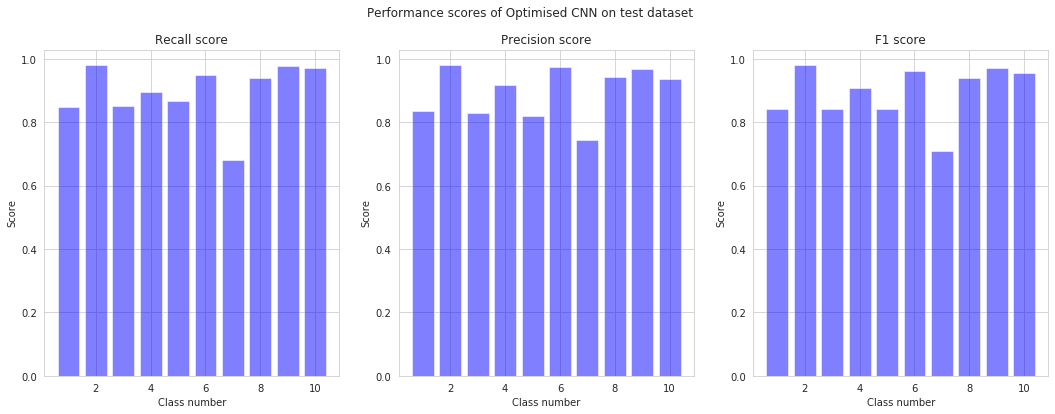

In [ ]:
# Computing scores on the test data
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

optscores = [[],[],[]]

# Calculating recall score
opttest_recall = recall_score(fash_mnist_test['label'], optpred, average=None)
optscores[0] = opttest_recall

# Calculating precision score
opttest_precision = precision_score(fash_mnist_test['label'], optpred, average=None)
optscores[1] = opttest_precision

# Calculating F1 score
opttest_f1 = f1_score(fash_mnist_test['label'], optpred, average=None)
optscores[2] = opttest_f1

# Printing...
print('Recall scores of the Optimised CNN on the test set:', opttest_recall)
print('Precision scores of the Optimised CNN on the test set:', opttest_precision)
print('F1 socres of the Optimised CNN on the test set:', opttest_f1)

titles = ['Recall score', 'Precision score', 'F1 score']
colors = ['#D81B60', '#1E88E5', '#FFC107']
plt.subplots(1,3,figsize=(18,6))
plt.suptitle('Performance scores of Optimised CNN on test dataset')

# Visualising
for i, score in enumerate(optscores):
  plt.subplot(131+i)
  plt.title('{}'.format(titles[i]))
  plt.xlabel('Class number')
  plt.ylabel('Score')
  plt.bar([1,2,3,4,5,6,7,8,9,10], optscores[i], color='blue', alpha=0.5, label='CNN')
#plt.legend(loc='lower right')

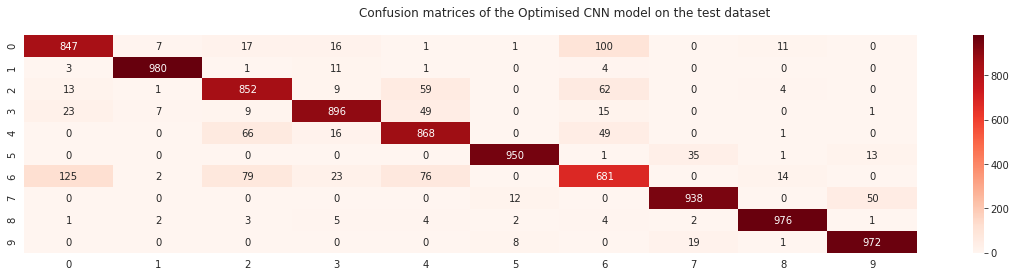

In [ ]:
ConfMat(optpred, fash_mnist_test['label'], 'Optimised CNN')

As our model previously achieved an in-sample accuracy of around 95%, but performed much worse on the test set, we suspected that this may be due to overfitting of the model to the training set. By adding a hidden layer with dropout regularisation to the fully connect section of the CNN's architecture, we have increased the CNN's test accuracy to above 90%. This supports our suspicions, as dropout regularisation attempts to mitigate overfitting to training data.

In [ ]:
import pickle
with open("/content/drive/My Drive/Methods for Data Science/netdropopt.pickle", 'wb') as f:
    pickle.dump(netdropopt, f)

In [ ]:
import pickle
with open("/content/drive/My Drive/Methods for Data Science/netdropopt.pickle", 'wb') as f:
    netdropopt = pickle.load(read, f)

NameError: ignored

In [ ]:
netdropopt

NameError: ignored